# **Forecasting Assignment**

# **Assignment 18(b)**

# ***2.CocaCola Sales DataSet(Cocacola_Sales_Rawdata.xlsx)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from numpy import sqrt
from numpy import log
from pandas import datetime
from pandas import DataFrame
from pandas import Grouper

import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

# **Importing DataSet**

In [2]:
#importing dataset
sales=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True)
sales

Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194.000000
41   Q2_96  5253.000000

# **Exploratory Data Analysis**

In [3]:
sales.shape

(42, 2)

In [4]:
#keeping a copy of data
sales1=sales.copy()

In [5]:
#checking the missing values
(sales.isna().sum())/len(sales)*100

Quarter    0.0
Sales      0.0
dtype: float64

In [6]:
sales.isna().any()

Quarter    False
Sales      False
dtype: bool

In [7]:
#checking duplicates
sales.duplicated().sum()

0

In [8]:
sales[sales.duplicated()]

Empty DataFrame
Columns: [Quarter, Sales]
Index: []

In [9]:
#checking datatypes
sales.dtypes

Quarter     object
Sales      float64
dtype: object

In [10]:
#describe
sales.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

In [11]:
#info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [12]:
#Feature analysis

In [13]:
sales=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx',header=0,index_col=0,parse_dates=True)
sales

Sales
Quarter             
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Q1_95    3854.000000
Q2_95    4936.000000
Q3_95    4895.000000
Q4_95    4333.000000
Q1_96    4194.000000
Q2_96    5253.000000

In [14]:
sales.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

In [15]:
sales.nunique()

Sales    42
dtype: int64

In [16]:
sales.value_counts()

Sales      
1547.818996    1
3629.000000    1
3039.522995    1
3056.000000    1
3172.115997    1
3243.859993    1
3352.000000    1
3373.000000    1
3508.000000    1
3550.000000    1
3854.000000    1
1734.827000    1
3899.000000    1
4017.000000    1
4194.000000    1
4333.000000    1
4342.000000    1
4461.000000    1
4895.000000    1
4936.000000    1
2879.000999    1
2792.753998    1
2772.000000    1
2739.307999    1
1869.049999    1
1910.603996    1
1991.746998    1
2014.362999    1
2026.828999    1
2104.411995    1
2128.320000    1
2148.278000    1
2154.962997    1
2173.967995    1
2206.549995    1
2244.960999    1
2313.631996    1
2331.164993    1
2480.973999    1
2533.804993    1
2556.009995    1
5253.000000    1
dtype: int64

In [17]:
sales.head()

Sales
Quarter             
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996

In [18]:
sales.tail()

Sales
Quarter        
Q2_95    4936.0
Q3_95    4895.0
Q4_95    4333.0
Q1_96    4194.0
Q2_96    5253.0

# **Visualization**

In [19]:
#from matplotlib import colormaps
#list(colormaps)

#It is use for seeing different colors and color palette for visualization purpose

# **LinePlot**

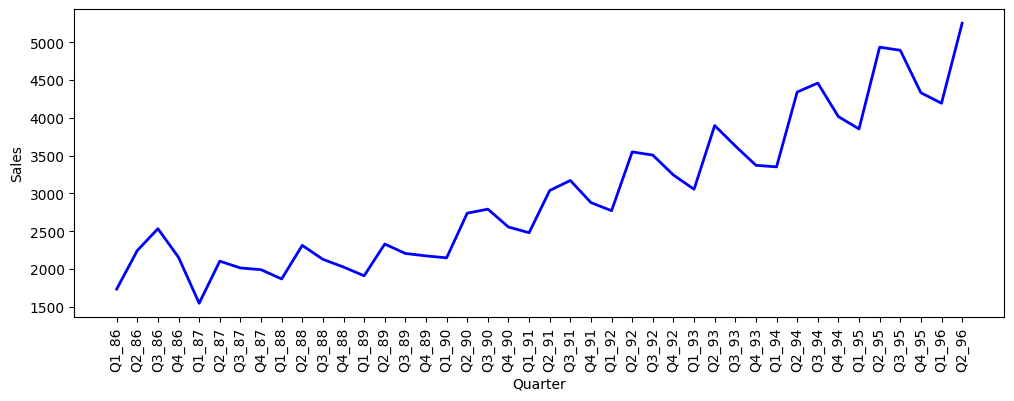

In [20]:
#lineplot
plt.figure(figsize=(12,4))
sns.lineplot(x='Quarter',y='Sales',data=sales,color='blue',linewidth=2)
plt.xticks(rotation=90,fontsize=10)
plt.show()

# **ScatterPlot**

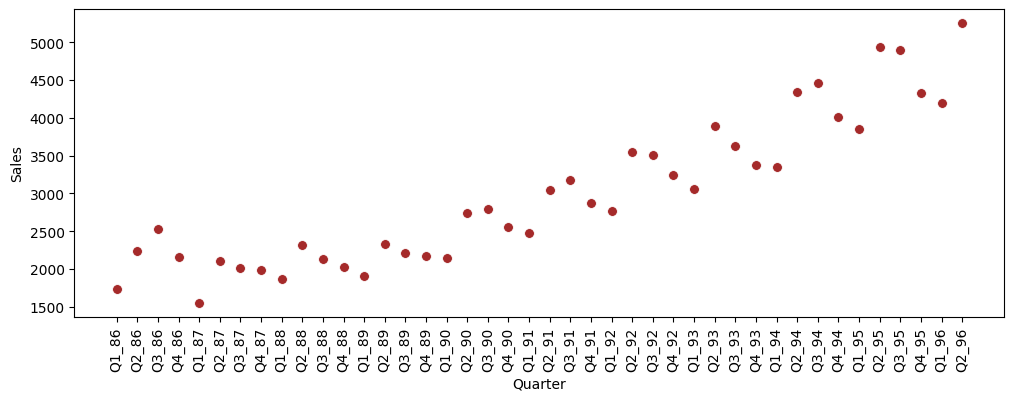

In [21]:
#scatterplot
plt.figure(figsize=(12,4))
sns.scatterplot(x='Quarter',y='Sales',data=sales,color='brown',s=50)
plt.xticks(rotation=90,fontsize=10)
plt.show()

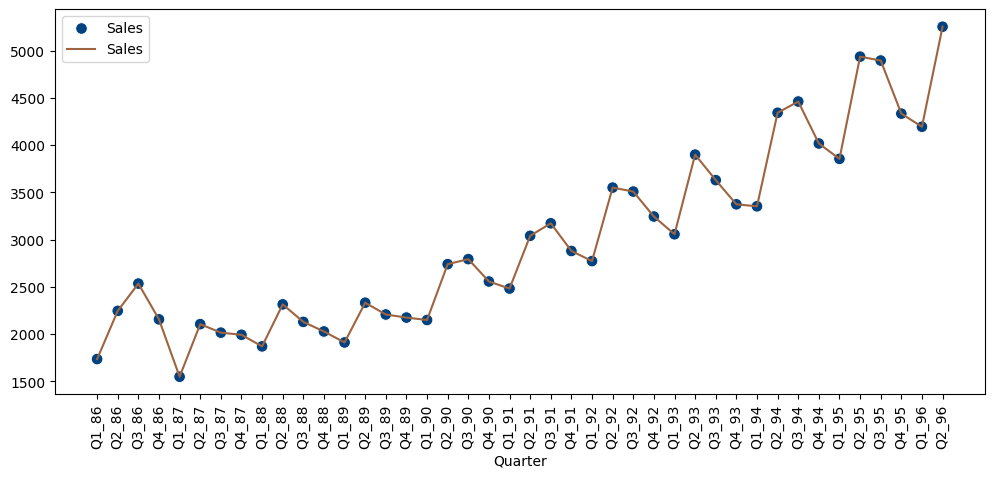

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(sales,palette='ocean',s=70)
sns.lineplot(sales,palette='copper')
plt.xticks(rotation=90,fontsize=10)
plt.show()

# **Histogram and Density Plots**

<Figure size 1200x500 with 0 Axes>

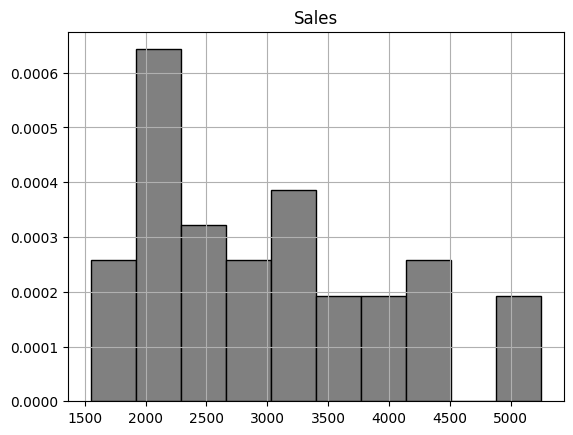

In [23]:
#histogram Plot
plt.figure(figsize=(12,5))
sales.hist(color='gray',edgecolor='black', density=True)
plt.show()

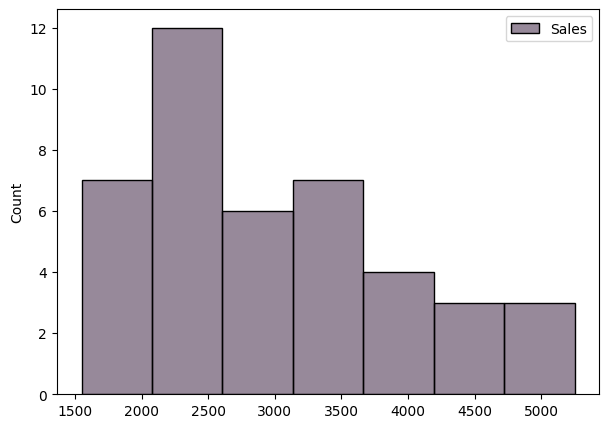

In [24]:
#histogram
plt.figure(figsize=(7,5))
sns.histplot(sales,palette='twilight_r')
plt.show()

<Axes: ylabel='Density'>

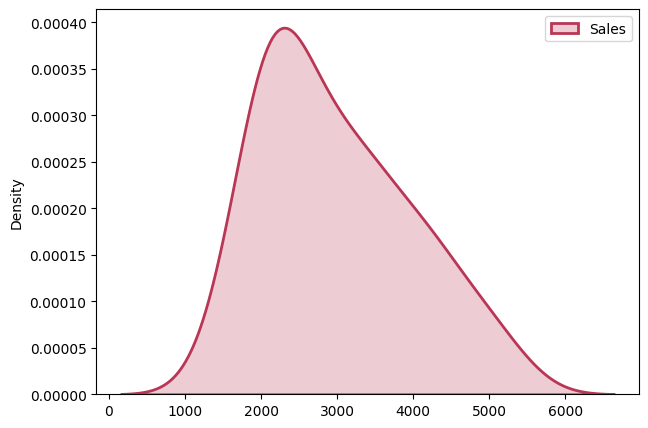

In [25]:
#densityplot
#kdeplot
plt.figure(figsize=(7,5))
sns.kdeplot(sales,palette='inferno_r',shade=True,linewidth=2)

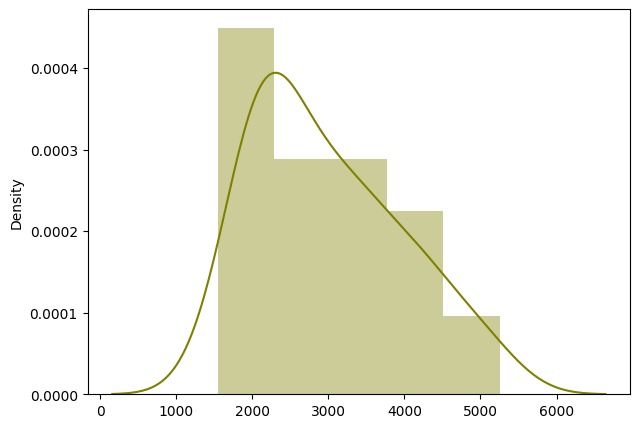

In [26]:
#distplot
plt.figure(figsize=(7,5))
sns.distplot(sales,color='olive')
plt.show()

# **LagPlot**

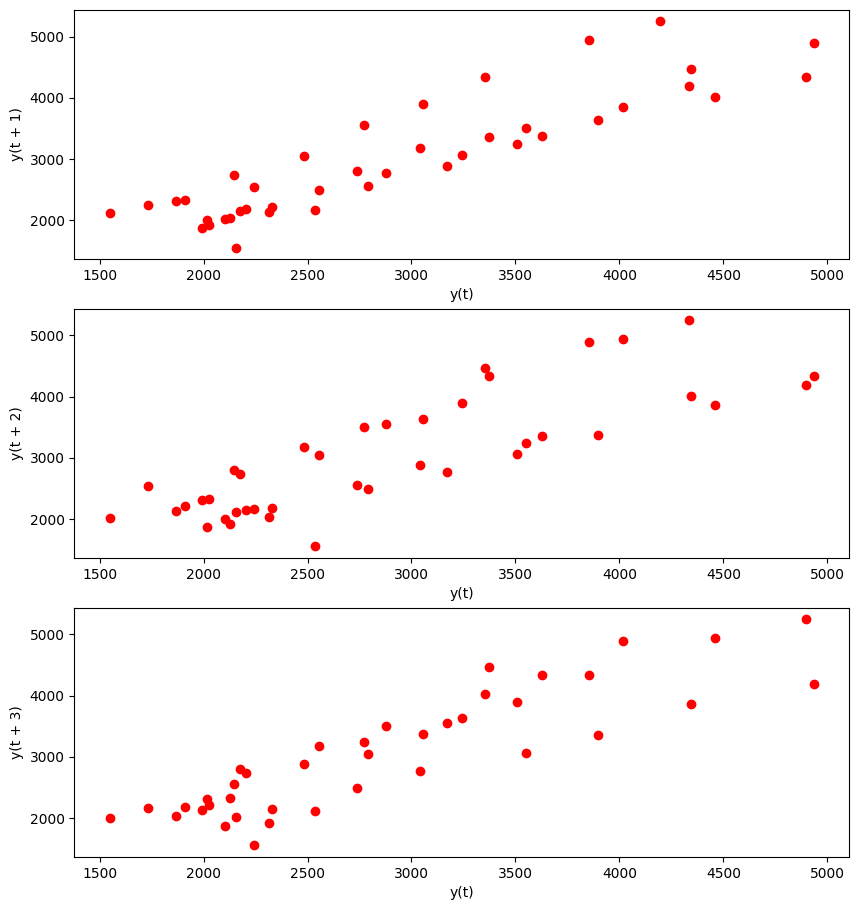

In [27]:
#lagplot
from pandas.plotting import lag_plot

plt.figure(figsize=(10,11))
plt.subplot(311)
lag_plot(sales,lag=1,c='red')
plt.subplot(312)
lag_plot(sales,lag=2,c='red')
plt.subplot(313)
lag_plot(sales,lag=3,c='red')
plt.show()

# **ACF Plot**

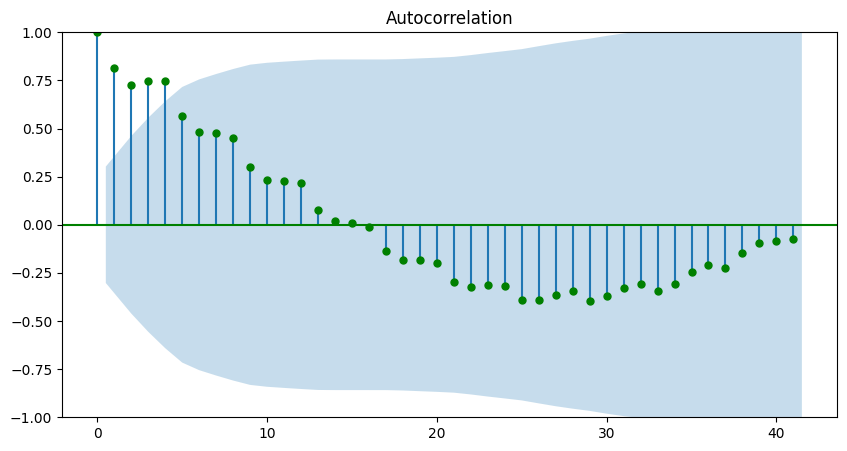

In [28]:
#acf plot
from statsmodels.graphics.tsaplots import plot_acf
fig,ax=plt.subplots(figsize=(10,5))
plot_acf(sales,lags=41,c='green',ax=ax)
plt.show()

<Axes: >

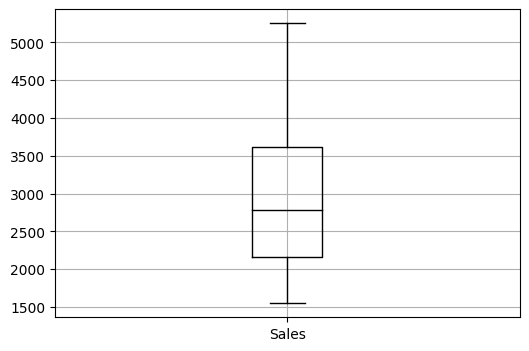

In [29]:
#boxplot
sales.boxplot(figsize=(6,4),color='black')

# **Feature Scaling**

# **Sampling and Transformation**

In [30]:
sales_trans=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True,squeeze=True)
sales_trans.head()

Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996

In [31]:
sales_trans['Quarter_Year']=sales_trans['Quarter'].str.split('_').apply(lambda x:' 19'.join(x[:]))
sales_trans.head()

Quarter        Sales Quarter_Year
0   Q1_86  1734.827000      Q1 1986
1   Q2_86  2244.960999      Q2 1986
2   Q3_86  2533.804993      Q3 1986
3   Q4_86  2154.962997      Q4 1986
4   Q1_87  1547.818996      Q1 1987

In [32]:
sales_trans['Date']=pd.to_datetime(sales_trans['Quarter_Year'].str.split(' ').apply(lambda x:''.join(x[::-1])),dayfirst=True)
sales_trans.head()

Quarter        Sales Quarter_Year       Date
0   Q1_86  1734.827000      Q1 1986 1986-01-01
1   Q2_86  2244.960999      Q2 1986 1986-04-01
2   Q3_86  2533.804993      Q3 1986 1986-07-01
3   Q4_86  2154.962997      Q4 1986 1986-10-01
4   Q1_87  1547.818996      Q1 1987 1987-01-01

In [33]:
sales_trans.drop(['Quarter_Year','Quarter'],axis=1,inplace=True)

# **Sampling**

**Upsample**

In [34]:
#making Quarters as index columns
sales_trans=sales_trans.set_index('Date')
sales_trans.head()

Sales
Date                   
1986-01-01  1734.827000
1986-04-01  2244.960999
1986-07-01  2533.804993
1986-10-01  2154.962997
1987-01-01  1547.818996

In [35]:
#upsample is use to increase the frequency. here we increase the frequency and convert it to "quarter-->month"

In [36]:
#upsample
upsample=sales_trans.resample('M').mean()
upsample.head(12)

Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN

In [37]:
#interpolation
interpolate=upsample.interpolate(method='linear')
interpolate.head(12)

Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330

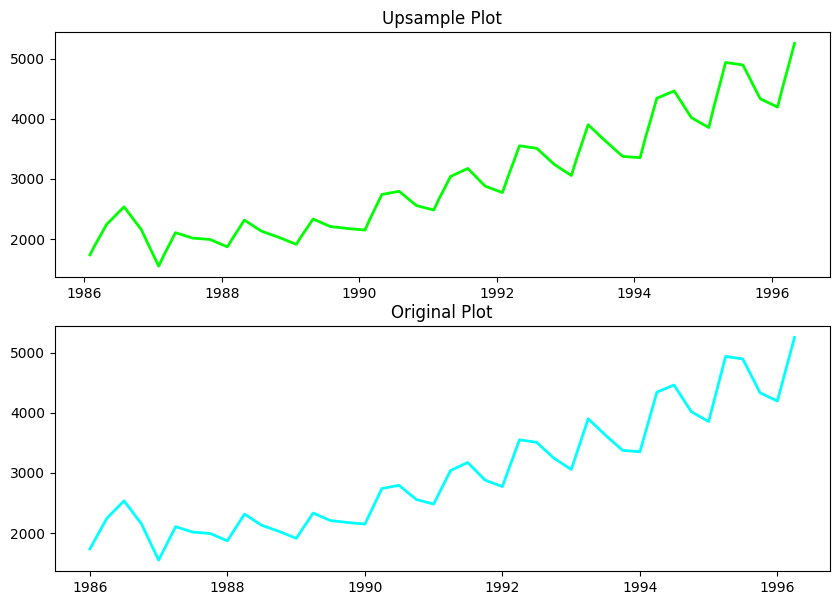

In [38]:
#plot for comparing upsample plot and original plot
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(interpolate,color='lime',linewidth=2)
plt.title('Upsample Plot')
plt.subplot(212)
plt.plot(sales_trans,color='cyan',linewidth=2)
plt.title('Original Plot')
plt.show()

**downsample**

In [39]:
#downsample
#It is use to decrease the frequency. Here we reduce the frequency and convert "quarters into years"

In [40]:
#downsample
downsample=sales_trans.resample('Y').mean()
downsample

Sales
Date                   
1986-12-31  2167.138997
1987-12-31  1914.585247
1988-12-31  2084.457748
1989-12-31  2155.571745
1990-12-31  2559.087498
1991-12-31  2892.903498
1992-12-31  3268.464998
1993-12-31  3489.250000
1994-12-31  4043.000000
1995-12-31  4504.500000
1996-12-31  4723.500000

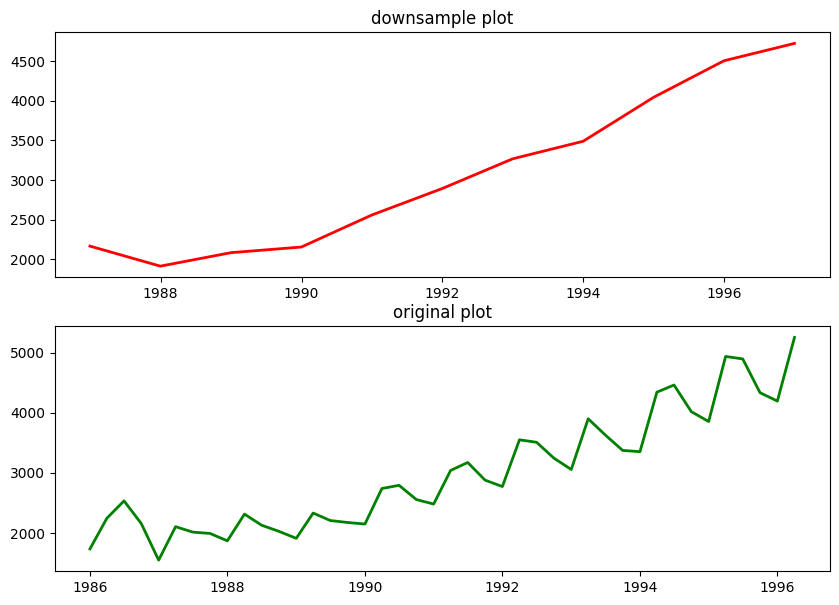

In [41]:
#plot for comparing downsample plot and original actual datasetplot
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(downsample,color='red',linewidth=2)
plt.title('downsample plot')
plt.subplot(212)
plt.plot(sales_trans,color='green',linewidth=2)
plt.title('original plot')
plt.show()

# **Before Transformation**

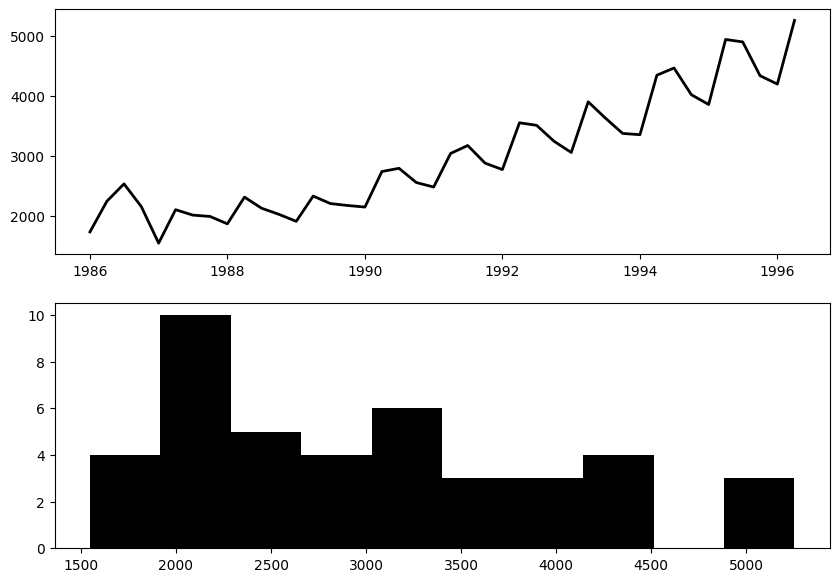

In [42]:
#original sales dataset
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(sales_trans,color='black',linewidth=2)
plt.subplot(212)
plt.hist(sales_trans,color='black')
plt.show()

# **Transformation**

In [43]:
#It is perform to convert non-stationary data into stationary data//
#Reduces trends and seasonality

# **SquareRoot Transformation**

In [44]:
from pandas import DataFrame
from numpy import sqrt

In [45]:
#squareroot transformation
squareroot=DataFrame(sales_trans.values)
squareroot.columns=['Sales']
squareroot['Sales']=sqrt(squareroot['Sales'])
squareroot.head()

Sales
0  41.651254
1  47.381019
2  50.336915
3  46.421579
4  39.342331

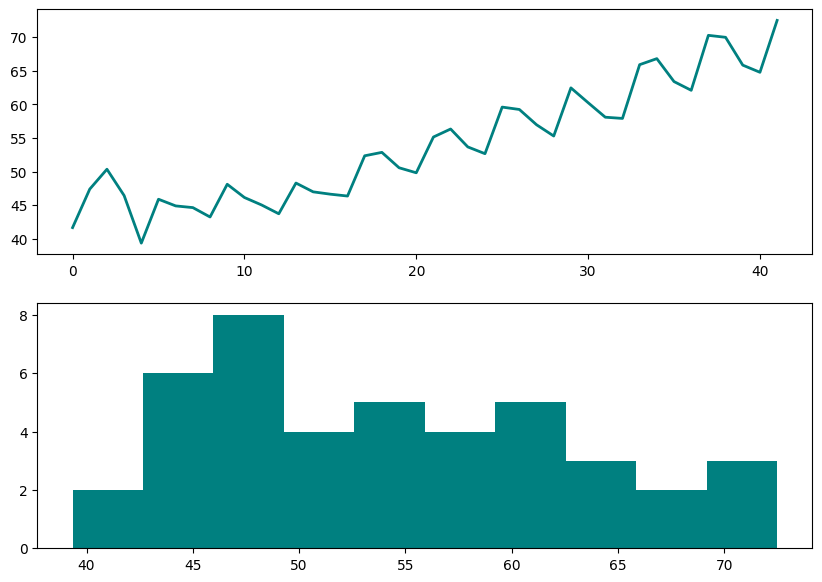

In [46]:
#plot for squareroot transformation
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(squareroot['Sales'],color='teal',linewidth=2)
plt.subplot(212)
plt.hist(squareroot['Sales'],color='teal')
plt.show()

# **Log Transformation**

In [47]:
from numpy import log

In [48]:
#log transformation
lg=DataFrame(sales_trans.values)
lg.columns=['Sales']
lg['Sales']=log(lg['Sales'])
lg.head()

Sales
0  7.458663
1  7.716443
2  7.837477
3  7.675529
4  7.344602

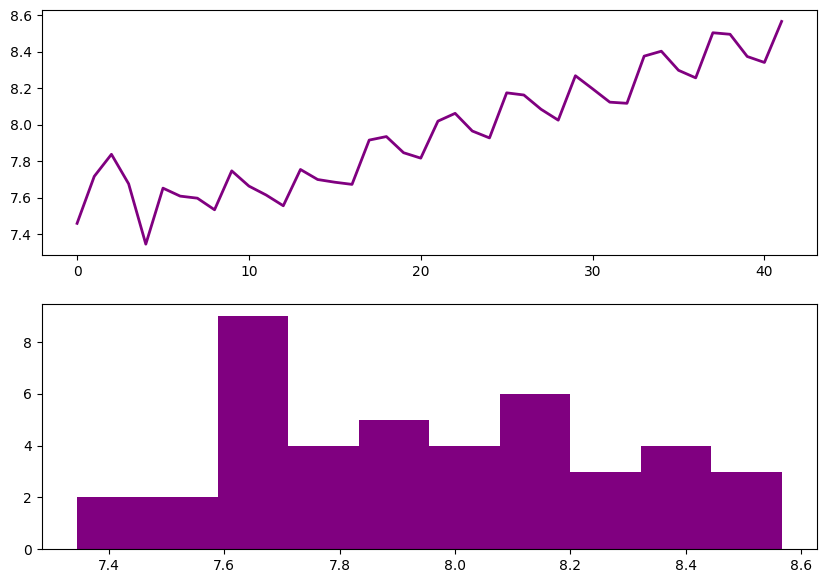

In [49]:
#plot for log transformation
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(lg['Sales'],color='purple',linewidth=2)
plt.subplot(212)
plt.hist(lg['Sales'],color='purple')
plt.show()

# **Feature Engineering**

In [50]:
#creating new features and managing existing features for model buliding

In [51]:
sales_df=pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx',header=0,parse_dates=True,squeeze=True)
sales_df.head()

Quarter        Sales
0   Q1_86  1734.827000
1   Q2_86  2244.960999
2   Q3_86  2533.804993
3   Q4_86  2154.962997
4   Q1_87  1547.818996

In [52]:
sales_df['Quarter_Year']=sales_df['Quarter'].str.split('_').apply(lambda x:' 19'.join(x[:]))
sales_df.head()

Quarter        Sales Quarter_Year
0   Q1_86  1734.827000      Q1 1986
1   Q2_86  2244.960999      Q2 1986
2   Q3_86  2533.804993      Q3 1986
3   Q4_86  2154.962997      Q4 1986
4   Q1_87  1547.818996      Q1 1987

In [53]:
sales_df['Date']=pd.to_datetime(sales_df['Quarter_Year'].str.split(' ').apply(lambda x:''.join(x[::-1])),dayfirst=True)
sales_df.head()

Quarter        Sales Quarter_Year       Date
0   Q1_86  1734.827000      Q1 1986 1986-01-01
1   Q2_86  2244.960999      Q2 1986 1986-04-01
2   Q3_86  2533.804993      Q3 1986 1986-07-01
3   Q4_86  2154.962997      Q4 1986 1986-10-01
4   Q1_87  1547.818996      Q1 1987 1987-01-01

In [54]:
sales_df['Quarters']=0
for i in range(42):
  p=sales_df['Quarter'][i]
  sales_df['Quarters'][i]=p[0:2]

sales_df.head()

Quarter        Sales Quarter_Year       Date Quarters
0   Q1_86  1734.827000      Q1 1986 1986-01-01       Q1
1   Q2_86  2244.960999      Q2 1986 1986-04-01       Q2
2   Q3_86  2533.804993      Q3 1986 1986-07-01       Q3
3   Q4_86  2154.962997      Q4 1986 1986-10-01       Q4
4   Q1_87  1547.818996      Q1 1987 1987-01-01       Q1

In [55]:
sales_df.drop('Quarter_Year',axis=1,inplace=True)

In [56]:
sales_df.head()

Quarter        Sales       Date Quarters
0   Q1_86  1734.827000 1986-01-01       Q1
1   Q2_86  2244.960999 1986-04-01       Q2
2   Q3_86  2533.804993 1986-07-01       Q3
3   Q4_86  2154.962997 1986-10-01       Q4
4   Q1_87  1547.818996 1987-01-01       Q1

**Separating Months and Years into separate columns for visualization** **purpose and for extracting meaningful insights**

In [57]:
sales_df['Date']=pd.to_datetime(sales_df['Date'],format='%b-%y')
sales_df['Months']=sales_df['Date'].dt.strftime('%b')
sales_df['Years']=sales_df['Date'].dt.strftime('%Y')

In [58]:
sales_df.head()

Quarter        Sales       Date Quarters Months Years
0   Q1_86  1734.827000 1986-01-01       Q1    Jan  1986
1   Q2_86  2244.960999 1986-04-01       Q2    Apr  1986
2   Q3_86  2533.804993 1986-07-01       Q3    Jul  1986
3   Q4_86  2154.962997 1986-10-01       Q4    Oct  1986
4   Q1_87  1547.818996 1987-01-01       Q1    Jan  1987

In [59]:
sales_df['t']=np.arange(1,43)
sales_df['t_square']=sales_df['t']*sales_df['t']
sales_df['log_sales']=log(sales_df.Sales)
sales_df.head()

Quarter        Sales       Date Quarters Months Years  t  t_square  \
0   Q1_86  1734.827000 1986-01-01       Q1    Jan  1986  1         1   
1   Q2_86  2244.960999 1986-04-01       Q2    Apr  1986  2         4   
2   Q3_86  2533.804993 1986-07-01       Q3    Jul  1986  3         9   
3   Q4_86  2154.962997 1986-10-01       Q4    Oct  1986  4        16   
4   Q1_87  1547.818996 1987-01-01       Q1    Jan  1987  5        25   

   log_sales  
0   7.458663  
1   7.716443  
2   7.837477  
3   7.675529  
4   7.344602

In [60]:
#changing the order of features
sales_df=sales_df.iloc[:,[0,1,4,6,2,3,5,7,8]]
sales_df.head()

Quarter        Sales Months  t       Date Quarters Years  t_square  \
0   Q1_86  1734.827000    Jan  1 1986-01-01       Q1  1986         1   
1   Q2_86  2244.960999    Apr  2 1986-04-01       Q2  1986         4   
2   Q3_86  2533.804993    Jul  3 1986-07-01       Q3  1986         9   
3   Q4_86  2154.962997    Oct  4 1986-10-01       Q4  1986        16   
4   Q1_87  1547.818996    Jan  5 1987-01-01       Q1  1987        25   

   log_sales  
0   7.458663  
1   7.716443  
2   7.837477  
3   7.675529  
4   7.344602

In [61]:
dummies=pd.DataFrame(pd.get_dummies(sales_df['Quarters']))
dummies

Q1  Q2  Q3  Q4
0    1   0   0   0
1    0   1   0   0
2    0   0   1   0
3    0   0   0   1
4    1   0   0   0
5    0   1   0   0
6    0   0   1   0
7    0   0   0   1
8    1   0   0   0
9    0   1   0   0
10   0   0   1   0
11   0   0   0   1
12   1   0   0   0
13   0   1   0   0
14   0   0   1   0
15   0   0   0   1
16   1   0   0   0
17   0   1   0   0
18   0   0   1   0
19   0   0   0   1
20   1   0   0   0
21   0   1   0   0
22   0   0   1   0
23   0   0   0   1
24   1   0   0   0
25   0   1   0   0
26   0   0   1   0
27   0   0   0   1
28   1   0   0   0
29   0   1   0   0
30   0   0   1   0
31   0   0   0   1
32   1   0   0   0
33   0   1   0   0
34   0   0   1   0
35   0   0   0   1
36   1   0   0   0
37   0   1   0   0
38   0   0   1   0
39   0   0   0   1
40   1   0   0   0
41   0   1   0   0

In [62]:
sales_df=pd.concat([sales_df,dummies],axis=1)
sales_df

Quarter        Sales Months   t       Date Quarters Years  t_square  \
0    Q1_86  1734.827000    Jan   1 1986-01-01       Q1  1986         1   
1    Q2_86  2244.960999    Apr   2 1986-04-01       Q2  1986         4   
2    Q3_86  2533.804993    Jul   3 1986-07-01       Q3  1986         9   
3    Q4_86  2154.962997    Oct   4 1986-10-01       Q4  1986        16   
4    Q1_87  1547.818996    Jan   5 1987-01-01       Q1  1987        25   
5    Q2_87  2104.411995    Apr   6 1987-04-01       Q2  1987        36   
6    Q3_87  2014.362999    Jul   7 1987-07-01       Q3  1987        49   
7    Q4_87  1991.746998    Oct   8 1987-10-01       Q4  1987        64   
8    Q1_88  1869.049999    Jan   9 1988-01-01       Q1  1988        81   
9    Q2_88  2313.631996    Apr  10 1988-04-01       Q2  1988       100   
10   Q3_88  2128.320000    Jul  11 1988-07-01       Q3  1988       121   
11   Q4_88  2026.828999    Oct  12 1988-10-01       Q4  1988       144   
12   Q1_89  1910.603996    Jan  13 1989-01-01       Q1  1989       169   
13   Q2_89  2331.164993    Apr  14 1989-04-01       Q2  1989       196   
14   Q3_89  2206.549995    Jul  15 1989-07-01       Q3  1989       225   
15   Q4_89  2173.967995    Oct  16 1989-10-01       Q4  1989       256   
16   Q1_90  2148.278000    Jan  17 1990-01-01       Q1  1990       289   
17   Q2_90  2739.307999    Apr  18 1990-04-01       Q2  1990       324   
18   Q3_90  2792.753998    Jul  19 1990-07-01       Q3  1990       361   
19   Q4_90  2556.009995    Oct  20 1990-10-01       Q4  1990       400   
20   Q1_91  2480.973999    Jan  21 1991-01-01       Q1  1991       441   
21   Q2_91  3039.522995    Apr  22 1991-04-01       Q2  1991       484   
22   Q3_91  3172.115997    Jul  23 1991-07-01       Q3  1991       529   
23   Q4_91  2879.000999    Oct  24 1991-10-01       Q4  1991       576   
24   Q1_92  2772.000000    Jan  25 1992-01-01       Q1  1992       625   
25   Q2_92  3550.000000    Apr  26 1992-04-01       Q2  1992       676   
26   Q3_92  3508.000000    Jul  27 1992-07-01       Q3  1992       729   
27   Q4_92  3243.859993    Oct  28 1992-10-01       Q4  1992       784   
28   Q1_93  3056.000000    Jan  29 1993-01-01       Q1  1993       841   
29   Q2_93  3899.000000    Apr  30 1993-04-01       Q2  1993       900   
30   Q3_93  3629.000000    Jul  31 1993-07-01       Q3  1993       961   
31   Q4_93  3373.000000    Oct  32 1993-10-01       Q4  1993      1024   
32   Q1_94  3352.000000    Jan  33 1994-01-01       Q1  1994      1089   
33   Q2_94  4342.000000    Apr  34 1994-04-01       Q2  1994      1156   
34   Q3_94  4461.000000    Jul  35 1994-07-01       Q3  1994      1225   
35   Q4_94  4017.000000    Oct  36 1994-10-01       Q4  1994      1296   
36   Q1_95  3854.000000    Jan  37 1995-01-01       Q1  1995      1369   
37   Q2_95  4936.000000    Apr  38 1995-04-01       Q2  1995      1444   
38   Q3_95  4895.000000    Jul  39 1995-07-01       Q3  1995      1521   
39   Q4_95  4333.000000    Oct  40 1995-10-01       Q4  1995      1600   
40   Q1_96  4194.000000    Jan  41 1996-01-01       Q1  1996      1681   
41   Q2_96  5253.000000    Apr  42 1996-04-01       Q2  1996      1764   

    log_sales  Q1  Q2  Q3  Q4  
0    7.458663   1   0   0   0  
1    7.716443   0   1   0   0  
2    7.837477   0   0   1   0  
3    7.675529   0   0   0   1  
4    7.344602   1   0   0   0  
5    7.651791   0   1   0   0  
6    7.608058   0   0   1   0  
7    7.596767   0   0   0   1  
8    7.533186   1   0   0   0  
9    7.746574   0   1   0   0  
10   7.663088   0   0   1   0  
11   7.614228   0   0   0   1  
12   7.555175   1   0   0   0  
13   7.754123   0   1   0   0  
14   7.699185   0   0   1   0  
15   7.684309   0   0   0   1  
16   7.672422   1   0   0   0  
17   7.915461   0   1   0   0  
18   7.934783   0   0   1   0  
19   7.846203   0   0   0   1  
20   7.816407   1   0   0   0  
21   8.019456   0   1   0   0  
22   8.062154   0   0   1   0  
23   7.965199   0   0   0   1  
24   7.927324   1   

In [63]:
sales_df.shape

(42, 13)

# **Visualization**

# **HeatMap Visualization**

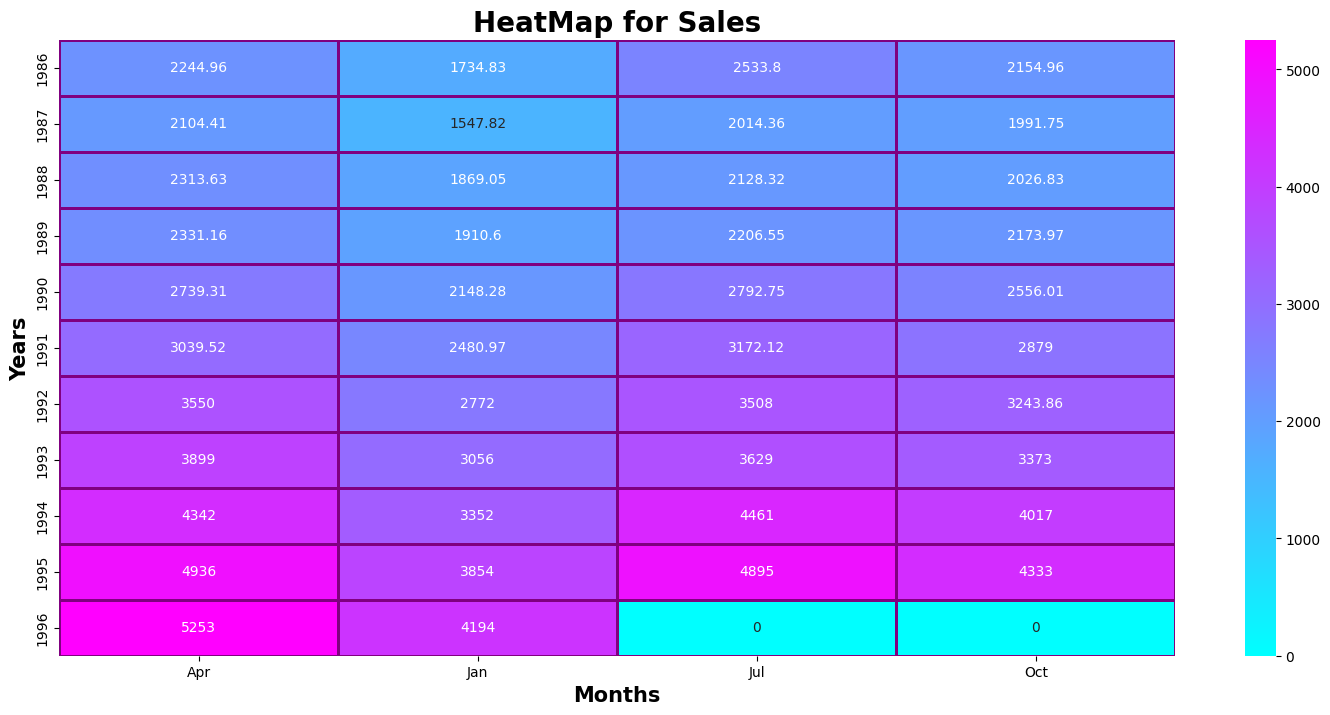

In [64]:
#heatmap
plt.figure(figsize=(18,8))
pivot=pd.pivot_table(data=sales_df,values='Sales',index='Years',columns='Months',aggfunc='mean',fill_value=0)
sns.heatmap(pivot,annot=True,cmap='cool',fmt='g',linewidth=0.73,linecolor='purple')
plt.title('HeatMap for Sales',fontweight='bold',fontsize=20)
plt.xlabel('Months',fontweight='bold',fontsize=15)
plt.ylabel('Years',fontweight='bold',fontsize=15)
plt.show()

# **BoxPlot**

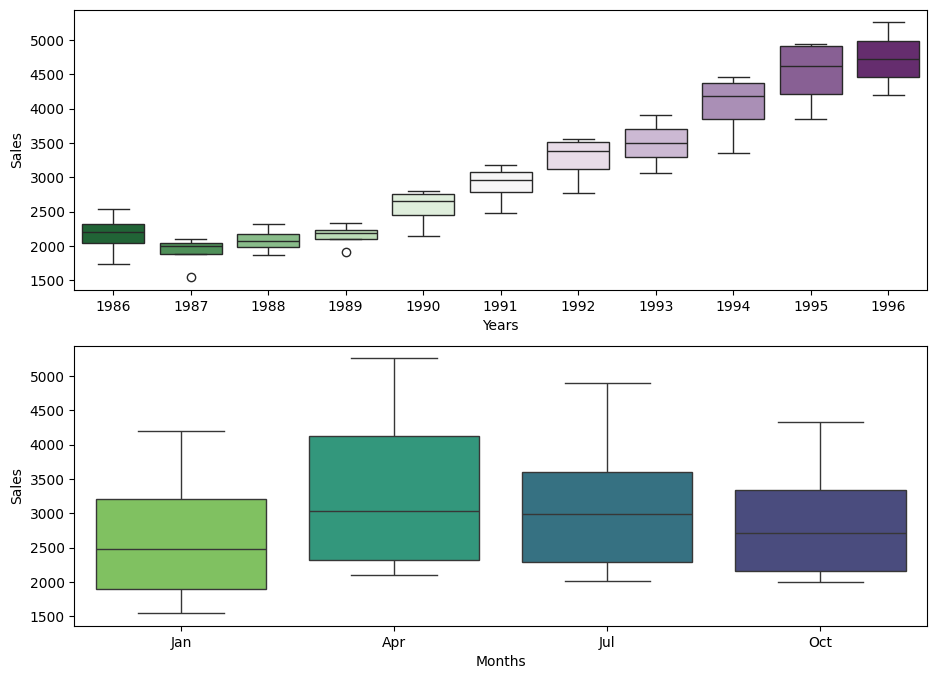

In [65]:
#boxplot
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.boxplot(x='Years',y='Sales',data=sales_df,palette='PRGn_r')
plt.subplot(212)
sns.boxplot(x='Months',y='Sales',data=sales_df,palette='viridis_r')
plt.show()

# **LinePlot**

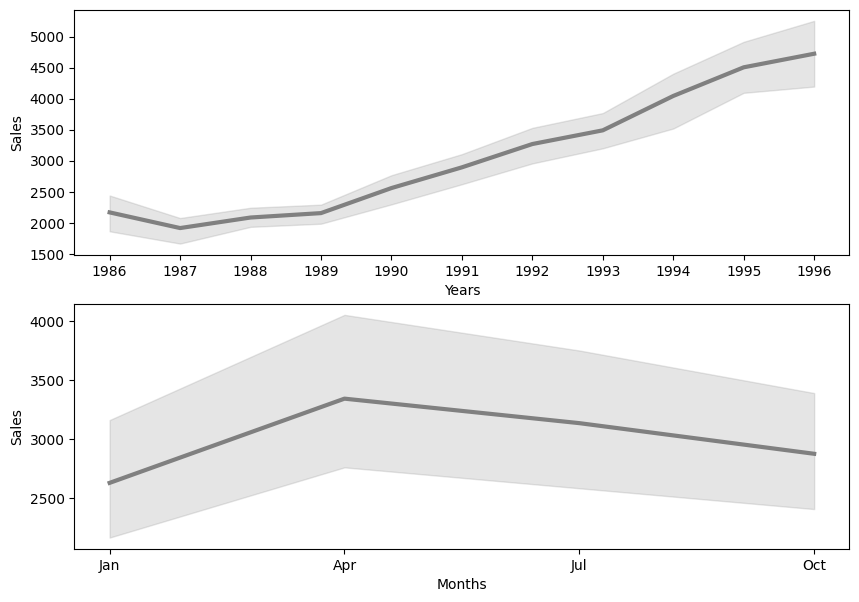

In [66]:
#lineplot
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.lineplot(x='Years',y='Sales',data=sales_df,color='gray',linewidth=3)
plt.subplot(212)
sns.lineplot(x='Months',y='Sales',data=sales_df,color='gray',linewidth=3)
plt.show()

# **Moving Average Method**

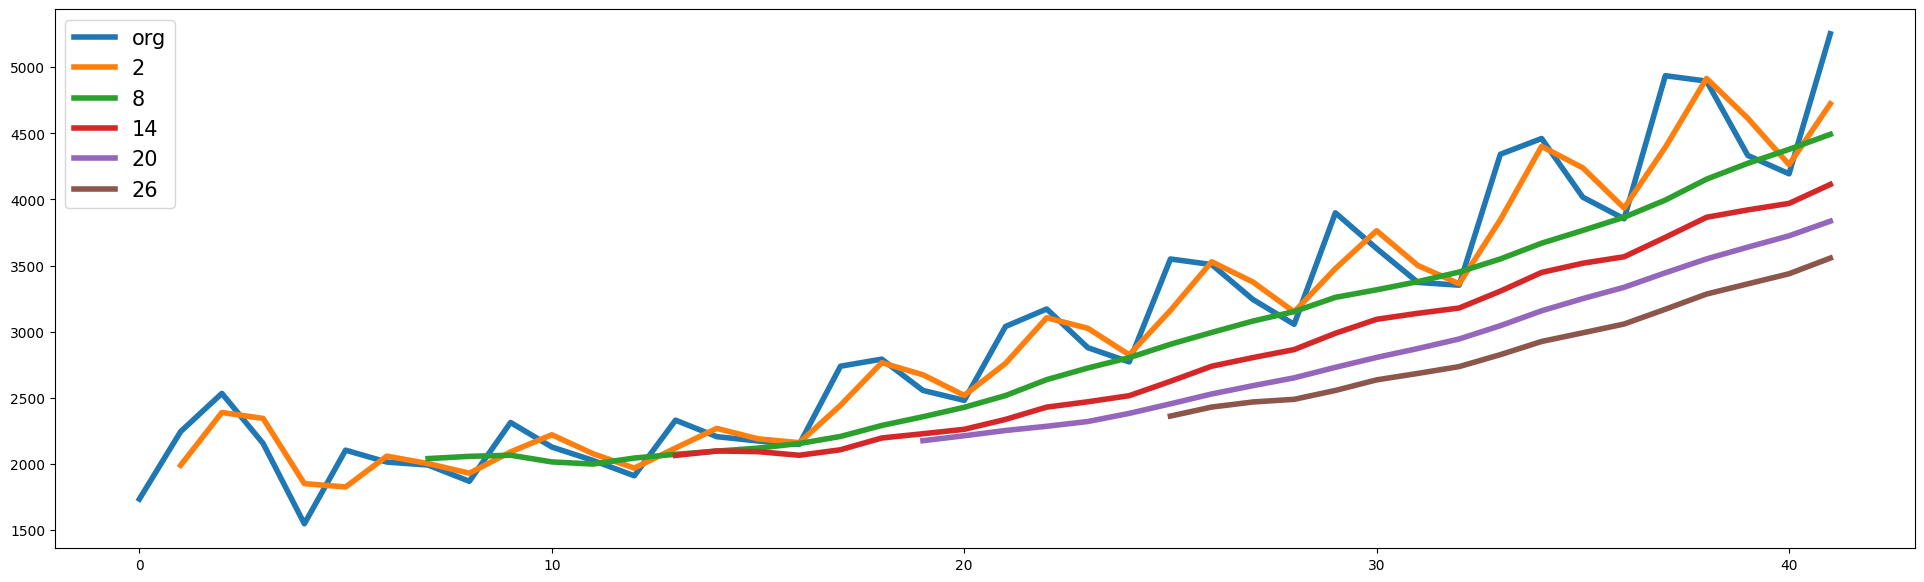

In [67]:
plt.figure(figsize=(24,7))
sales_df['Sales'].plot(label='org',linewidth=4)
for i in range(2,30,6):
  sales_df['Sales'].rolling(i).mean().plot(label=str(i),linewidth=4)
plt.legend(fontsize=15,loc='upper left')

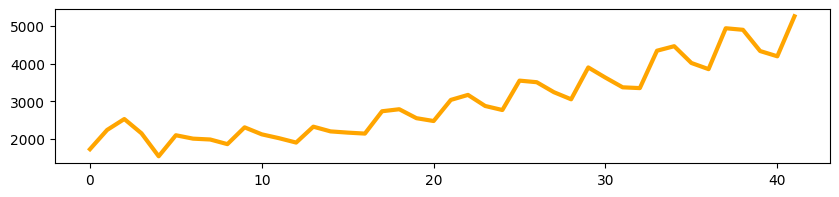

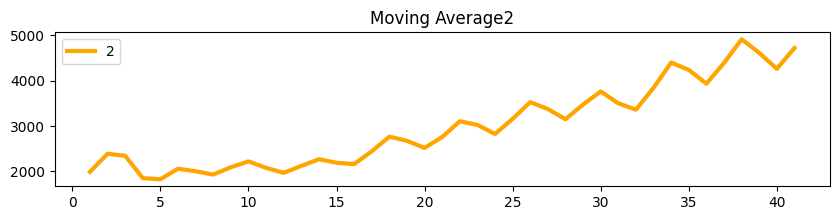

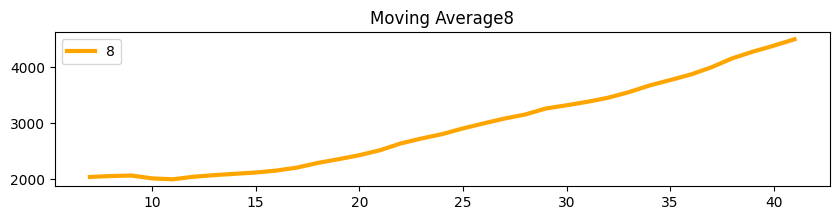

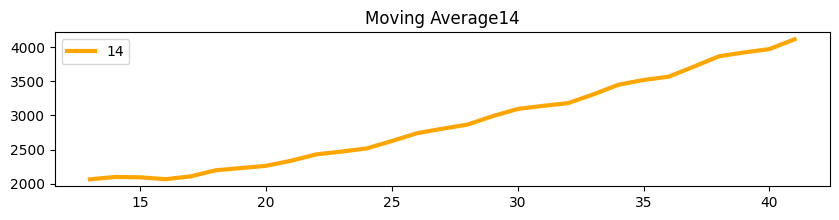

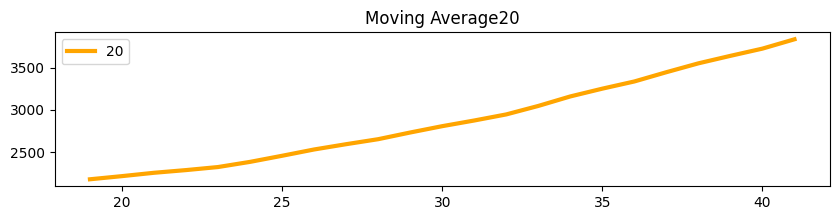

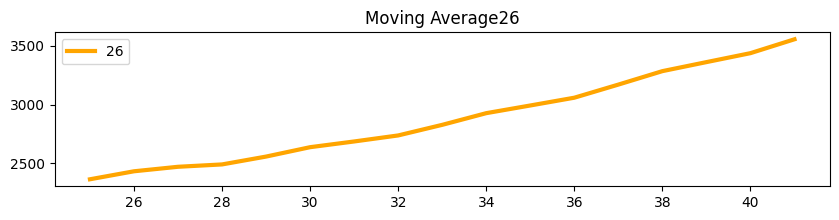

In [68]:
plt.figure(figsize=(10,2))
sales_df['Sales'].plot(label='org',color='orange',linewidth=3)
for i in range(2,30,6):
  plt.figure(figsize=(10,2))
  sales_df['Sales'].rolling(i).mean().plot(label=str(i),color='orange',linewidth=3)
  plt.title('Moving Average'+str(i))
  plt.legend(loc='best')
  plt.show()

# **Time Series Decompose Plot**

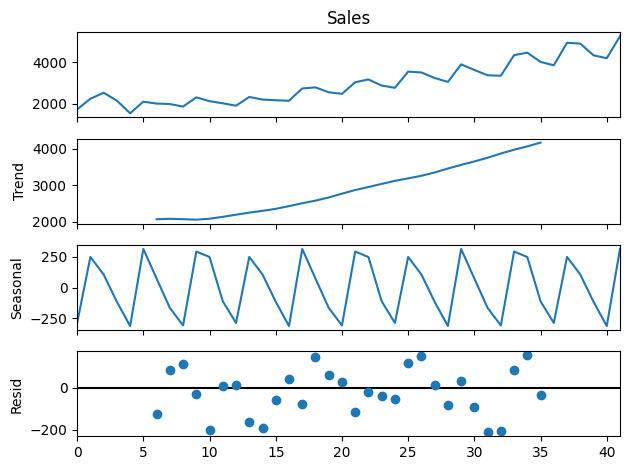

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(sales_df['Sales'],period=12)
decompose.plot()
plt.show()

# **ACF and PACF Plots**

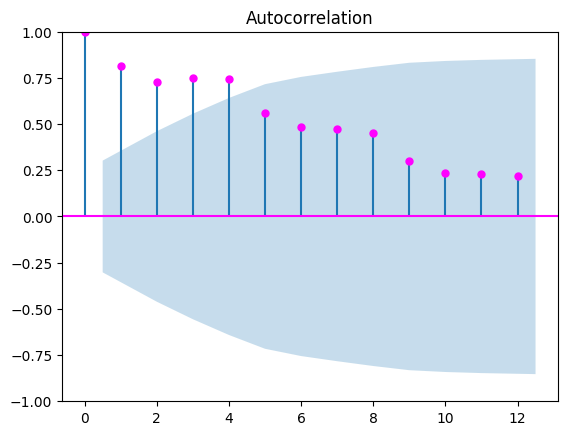

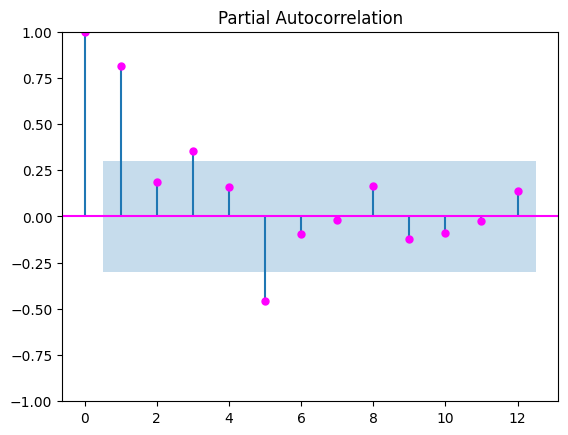

In [70]:
import statsmodels.graphics.tsaplots as tsa_plots
#acf plot
tsa_plots.plot_acf(sales_df['Sales'],lags=12,color='fuchsia')
#pacf plot
tsa_plots.plot_pacf(sales_df['Sales'],lags=12,color='fuchsia')
plt.show()

# **Spliting  data**

**spliting into training and testing data**

In [71]:
#spliting into training and testing

In [72]:
train=sales_df.iloc[:len(sales_df)-10]
test=sales_df.iloc[len(sales_df)-10:]

In [73]:
train=sales_df.head(32)
test=sales_df.tail(10)

In [74]:
train

Quarter        Sales Months   t       Date Quarters Years  t_square  \
0    Q1_86  1734.827000    Jan   1 1986-01-01       Q1  1986         1   
1    Q2_86  2244.960999    Apr   2 1986-04-01       Q2  1986         4   
2    Q3_86  2533.804993    Jul   3 1986-07-01       Q3  1986         9   
3    Q4_86  2154.962997    Oct   4 1986-10-01       Q4  1986        16   
4    Q1_87  1547.818996    Jan   5 1987-01-01       Q1  1987        25   
5    Q2_87  2104.411995    Apr   6 1987-04-01       Q2  1987        36   
6    Q3_87  2014.362999    Jul   7 1987-07-01       Q3  1987        49   
7    Q4_87  1991.746998    Oct   8 1987-10-01       Q4  1987        64   
8    Q1_88  1869.049999    Jan   9 1988-01-01       Q1  1988        81   
9    Q2_88  2313.631996    Apr  10 1988-04-01       Q2  1988       100   
10   Q3_88  2128.320000    Jul  11 1988-07-01       Q3  1988       121   
11   Q4_88  2026.828999    Oct  12 1988-10-01       Q4  1988       144   
12   Q1_89  1910.603996    Jan  13 1989-01-01       Q1  1989       169   
13   Q2_89  2331.164993    Apr  14 1989-04-01       Q2  1989       196   
14   Q3_89  2206.549995    Jul  15 1989-07-01       Q3  1989       225   
15   Q4_89  2173.967995    Oct  16 1989-10-01       Q4  1989       256   
16   Q1_90  2148.278000    Jan  17 1990-01-01       Q1  1990       289   
17   Q2_90  2739.307999    Apr  18 1990-04-01       Q2  1990       324   
18   Q3_90  2792.753998    Jul  19 1990-07-01       Q3  1990       361   
19   Q4_90  2556.009995    Oct  20 1990-10-01       Q4  1990       400   
20   Q1_91  2480.973999    Jan  21 1991-01-01       Q1  1991       441   
21   Q2_91  3039.522995    Apr  22 1991-04-01       Q2  1991       484   
22   Q3_91  3172.115997    Jul  23 1991-07-01       Q3  1991       529   
23   Q4_91  2879.000999    Oct  24 1991-10-01       Q4  1991       576   
24   Q1_92  2772.000000    Jan  25 1992-01-01       Q1  1992       625   
25   Q2_92  3550.000000    Apr  26 1992-04-01       Q2  1992       676   
26   Q3_92  3508.000000    Jul  27 1992-07-01       Q3  1992       729   
27   Q4_92  3243.859993    Oct  28 1992-10-01       Q4  1992       784   
28   Q1_93  3056.000000    Jan  29 1993-01-01       Q1  1993       841   
29   Q2_93  3899.000000    Apr  30 1993-04-01       Q2  1993       900   
30   Q3_93  3629.000000    Jul  31 1993-07-01       Q3  1993       961   
31   Q4_93  3373.000000    Oct  32 1993-10-01       Q4  1993      1024   

    log_sales  Q1  Q2  Q3  Q4  
0    7.458663   1   0   0   0  
1    7.716443   0   1   0   0  
2    7.837477   0   0   1   0  
3    7.675529   0   0   0   1  
4    7.344602   1   0   0   0  
5    7.651791   0   1   0   0  
6    7.608058   0   0   1   0  
7    7.596767   0   0   0   1  
8    7.533186   1   0   0   0  
9    7.746574   0   1   0   0  
10   7.663088   0   0   1   0  
11   7.614228   0   0   0   1  
12   7.555175   1   0   0   0  
13   7.754123   0   1   0   0  
14   7.699185   0   0   1   0  
15   7.684309   0   0   0   1  
16   7.672422   1   0   0   0  
17   7.915461   0   1   0   0  
18   7.934783   0   0   1   0  
19   7.846203   0   0   0   1  
20   7.816407   1   0   0   0  
21   8.019456   0   1   0   0  
22   8.062154   0   0   1   0  
23   7.965199   0   0   0   1  
24   7.927324   1   0   0   0  
25   8.174703   0   1   0   0  
26   8.162801   0   0   1   0  
27   8.084519   0   0   0   1  
28   8.024862   1   0   0   0  
29   8.268475   0   1   0   0  
30   8.196712   0   0   1   0  
31   8.123558   0   0   0   1

In [75]:
test

Quarter   Sales Months   t       Date Quarters Years  t_square  log_sales  \
32   Q1_94  3352.0    Jan  33 1994-01-01       Q1  1994      1089   8.117312   
33   Q2_94  4342.0    Apr  34 1994-04-01       Q2  1994      1156   8.376090   
34   Q3_94  4461.0    Jul  35 1994-07-01       Q3  1994      1225   8.403128   
35   Q4_94  4017.0    Oct  36 1994-10-01       Q4  1994      1296   8.298291   
36   Q1_95  3854.0    Jan  37 1995-01-01       Q1  1995      1369   8.256867   
37   Q2_95  4936.0    Apr  38 1995-04-01       Q2  1995      1444   8.504311   
38   Q3_95  4895.0    Jul  39 1995-07-01       Q3  1995      1521   8.495970   
39   Q4_95  4333.0    Oct  40 1995-10-01       Q4  1995      1600   8.374015   
40   Q1_96  4194.0    Jan  41 1996-01-01       Q1  1996      1681   8.341410   
41   Q2_96  5253.0    Apr  42 1996-04-01       Q2  1996      1764   8.566555   

    Q1  Q2  Q3  Q4  
32   1   0   0   0  
33   0   1   0   0  
34   0   0   1   0  
35   0   0   0   1  
36   1   0   0   0  
37   0   1   0   0  
38   0   0   1   0  
39   0   0   0   1  
40   1   0   0   0  
41   0   1   0   0

In [76]:
print(train.shape)
print(test.shape)

(32, 13)
(10, 13)


In [77]:
print(len(train))
print(len(test))

32
10


# **Forecasting Models**

# **Models Driven Methods**

# ***Building Different Forecasting Models and Comparing RMSE Values***

In [78]:
import statsmodels.formula.api as smf

**1.Linear Model**

In [79]:
#linear model
linear=smf.ols('Sales~t',data=train).fit()
linear_pred=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(linear_pred))**2))
print('rmse_linear:',rmse_linear)

rmse_linear: 752.9233932767116


In [80]:
linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.71
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.59e-10
Time:                        12:50:22   Log-Likelihood:                -228.29
No. Observations:                  32   AIC:                             460.6
Df Residuals:                      30   BIC:                             463.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1628.7787    113.439     14.358      0.000    1397.104    1860.453
t             56.8275      6.000      9.472      0.000      44.575      69.080
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.731
Skew:                           0.519   Prob(JB):                        0.421
Kurtosis:                       2.531   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2.Exponential Model**

In [81]:
#Exponential Model
exponential=smf.ols('log_sales~t',data=train).fit()
exponential_pred=pd.Series(exponential.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(exponential_pred)))**2))
print('rmse_exp:',rmse_exp)

rmse_exp: 590.3316432076487


In [82]:
exponential.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     87.79
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.04e-10
Time:                        12:50:22   Log-Likelihood:                 23.071
No. Observations:                  32   AIC:                            -42.14
Df Residuals:                      30   BIC:                            -39.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4632      0.044    169.648      0.000       7.373       7.553
t              0.0218      0.002      9.370      0.000       0.017       0.027
==============================================================================
Omnibus:                        1.165   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.732
Skew:                           0.370   Prob(JB):                        0.693
Kurtosis:                       2.971   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.Quadratic Model**

In [83]:
#Quadratic Model
quad=smf.ols('Sales~t+t_square',data=train).fit()
quad_pred=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(quad_pred))**2))
print('rmse_quad:',rmse_quad)

rmse_quad: 457.735735540752


In [84]:
quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     65.96
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           1.62e-11
Time:                        12:50:22   Log-Likelihood:                -223.01
No. Observations:                  32   AIC:                             452.0
Df Residuals:                      29   BIC:                             456.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2023.7004    152.790     13.245      0.000    1711.211    2336.190
t            -12.8646     21.346     -0.603      0.551     -56.521      30.792
t_square       2.1119      0.628      3.365      0.002       0.828       3.395
==============================================================================
Omnibus:                        2.222   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.302
Skew:                           0.164   Prob(JB):                        0.521
Kurtosis:                       2.068   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**4.Additive Seasonality**

In [85]:
#Additive Seasonality
add_sea=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
add_sea_pred=pd.Series(add_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(add_sea_pred))**2))
print('rmse_add_sea:',rmse_add_sea)

rmse_add_sea: 1850.466546185835


In [86]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.641
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.202
Time:                        12:50:22   Log-Likelihood:                -247.84
No. Observations:                  32   AIC:                             503.7
Df Residuals:                      28   BIC:                             509.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2053.1460     84.508     24.295      0.000    1880.040    2226.252
Q1           136.7980    184.180      0.743      0.464    -240.478     514.074
Q2           724.6041    184.180      3.934      0.001     347.328    1101.880
Q3           694.9675    184.180      3.773      0.001     317.691    1072.244
Q4           496.7763    184.180      2.697      0.012     119.500     874.052
==============================================================================
Omnibus:                        7.279   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                3.051
Skew:                           0.464   Prob(JB):                        0.218
Kurtosis:                       1.805   Cond. No.                     5.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**5.Additive Seasonality Quadratic**

In [87]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
add_sea_quad_pred=pd.Series(add_sea_quad.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4','t','t_square']])))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(add_sea_quad_pred))**2))
print('rmse_add_sea_quad:',rmse_add_sea_quad)

rmse_add_sea_quad: 277.35107711285275


In [88]:
add_sea_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     84.55
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.09e-15
Time:                        12:50:22   Log-Likelihood:                -204.86
No. Observations:                  32   AIC:                             421.7
Df Residuals:                      26   BIC:                             430.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1633.5550     73.370     22.265      0.000    1482.741    1784.369
t            -14.7127     12.789     -1.150      0.260     -41.001      11.576
t_square       2.1461      0.376      5.710      0.000       1.374       2.919
Q1           113.9194     52.033      2.189      0.038       6.964     220.875
Q2           649.9076     52.663     12.341      0.000     541.657     758.158
Q3           564.1608     53.270     10.591      0.000     454.662     673.659
Q4           305.5671     53.855      5.674      0.000     194.866     416.268
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.081
Skew:                           0.082   Prob(JB):                        0.960
Kurtosis:                       2.817   Cond. No.                     2.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**6.Multiplicative Seasonality**

In [89]:
#Multiplicative Seasonality
mul_sea=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
mul_sea_pred=pd.Series(mul_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_mul_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(mul_sea_pred)))**2))
print('rmse_mul_sea:',rmse_mul_sea)

rmse_mul_sea: 1908.250394836114


In [90]:
mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.889
Date:                Wed, 17 Jan 2024   Prob (F-statistic):              0.154
Time:                        12:50:23   Log-Likelihood:                 4.1361
No. Observations:                  32   AIC:                           -0.2722
Df Residuals:                      28   BIC:                             5.591
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2584      0.032    194.679      0.000       6.193       6.324
Q1             1.4082      0.070     20.099      0.000       1.265       1.552
Q2             1.6475      0.070     23.515      0.000       1.504       1.791
Q3             1.6372      0.070     23.367      0.000       1.494       1.781
Q4             1.5654      0.070     22.343      0.000       1.422       1.709
==============================================================================
Omnibus:                       10.897   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                2.853
Skew:                           0.281   Prob(JB):                        0.240
Kurtosis:                       1.649   Cond. No.                     5.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**7.Multiplicative Seasonality Quadratic**

In [91]:
#Multiplicative Seasonality Quadratic
mul_sea_quad=smf.ols('log_sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
mul_sea_quad_pred=pd.Series(mul_sea_quad.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4','t','t_square']])))
rmse_mul_sea_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(mul_sea_quad_pred)))**2))
print('rmse_mul_sea_quad:',rmse_mul_sea_quad)

rmse_mul_sea_quad: 801.9777856532319


In [92]:
mul_sea_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     63.59
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           9.54e-14
Time:                        12:50:23   Log-Likelihood:                 42.506
No. Observations:                  32   AIC:                            -73.01
Df Residuals:                      26   BIC:                            -64.22
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0735      0.032    188.397      0.000       6.007       6.140
t             -0.0002      0.006     -0.038      0.970      -0.012       0.011
t_square       0.0007      0.000      3.973      0.001       0.000       0.001
Q1             1.3935      0.023     60.952      0.000       1.347       1.441
Q2             1.6127      0.023     69.694      0.000       1.565       1.660
Q3             1.5809      0.023     67.542      0.000       1.533       1.629
Q4             1.4864      0.024     62.815      0.000       1.438       1.535
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.462
Skew:                           0.172   Prob(JB):                        0.794
Kurtosis:                       3.477   Cond. No.                     2.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**8.Multiplicative Additive Seasonality**

In [93]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train).fit()
mul_add_sea_pred=pd.Series(mul_add_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4','t']])))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(mul_add_sea_pred)))**2))
print('rmse_mul_add_sea:',rmse_mul_add_sea)

rmse_mul_add_sea: 448.86781826918656


In [94]:
mul_add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     48.81
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           5.63e-12
Time:                        12:50:23   Log-Likelihood:                 34.914
No. Observations:                  32   AIC:                            -59.83
Df Residuals:                      27   BIC:                            -52.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9754      0.026    231.897      0.000       5.922       6.028
t              0.0214      0.002     12.563      0.000       0.018       0.025
Q1             1.3696      0.027     49.910      0.000       1.313       1.426
Q2             1.5875      0.028     57.341      0.000       1.531       1.644
Q3             1.5557      0.028     55.502      0.000       1.498       1.613
Q4             1.4625      0.028     51.365      0.000       1.404       1.521
==============================================================================
Omnibus:                        4.848   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.252
Skew:                           0.654   Prob(JB):                        0.197
Kurtosis:                       3.852   Cond. No.                     8.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **Comparing all RMSE Values**

**DataFrame showing all RMSE Values**

In [95]:
#dataframe showing all RMSE Values

In [96]:
rmsedata={'MODELS':pd.Series(['Linear_RMSE','Exponential_RMSE','Quadratic_RMSE','Add_Sea_RMSE','Add_Sea_Quad_RMSE','Mul_Sea_RMSE','Mul_Sea_Quad_RMSE','Mul_Add_Sea_RMSE']),
          'RMSE_Values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_sea_quad,rmse_mul_add_sea])}
RMSE_Table=pd.DataFrame(rmsedata)
RMSE_Table.sort_values(['RMSE_Values'],inplace=True)
RMSE_Table

MODELS  RMSE_Values
4  Add_Sea_Quad_RMSE   277.351077
7   Mul_Add_Sea_RMSE   448.867818
2     Quadratic_RMSE   457.735736
1   Exponential_RMSE   590.331643
0        Linear_RMSE   752.923393
6  Mul_Sea_Quad_RMSE   801.977786
3       Add_Sea_RMSE  1850.466546
5       Mul_Sea_RMSE  1908.250395

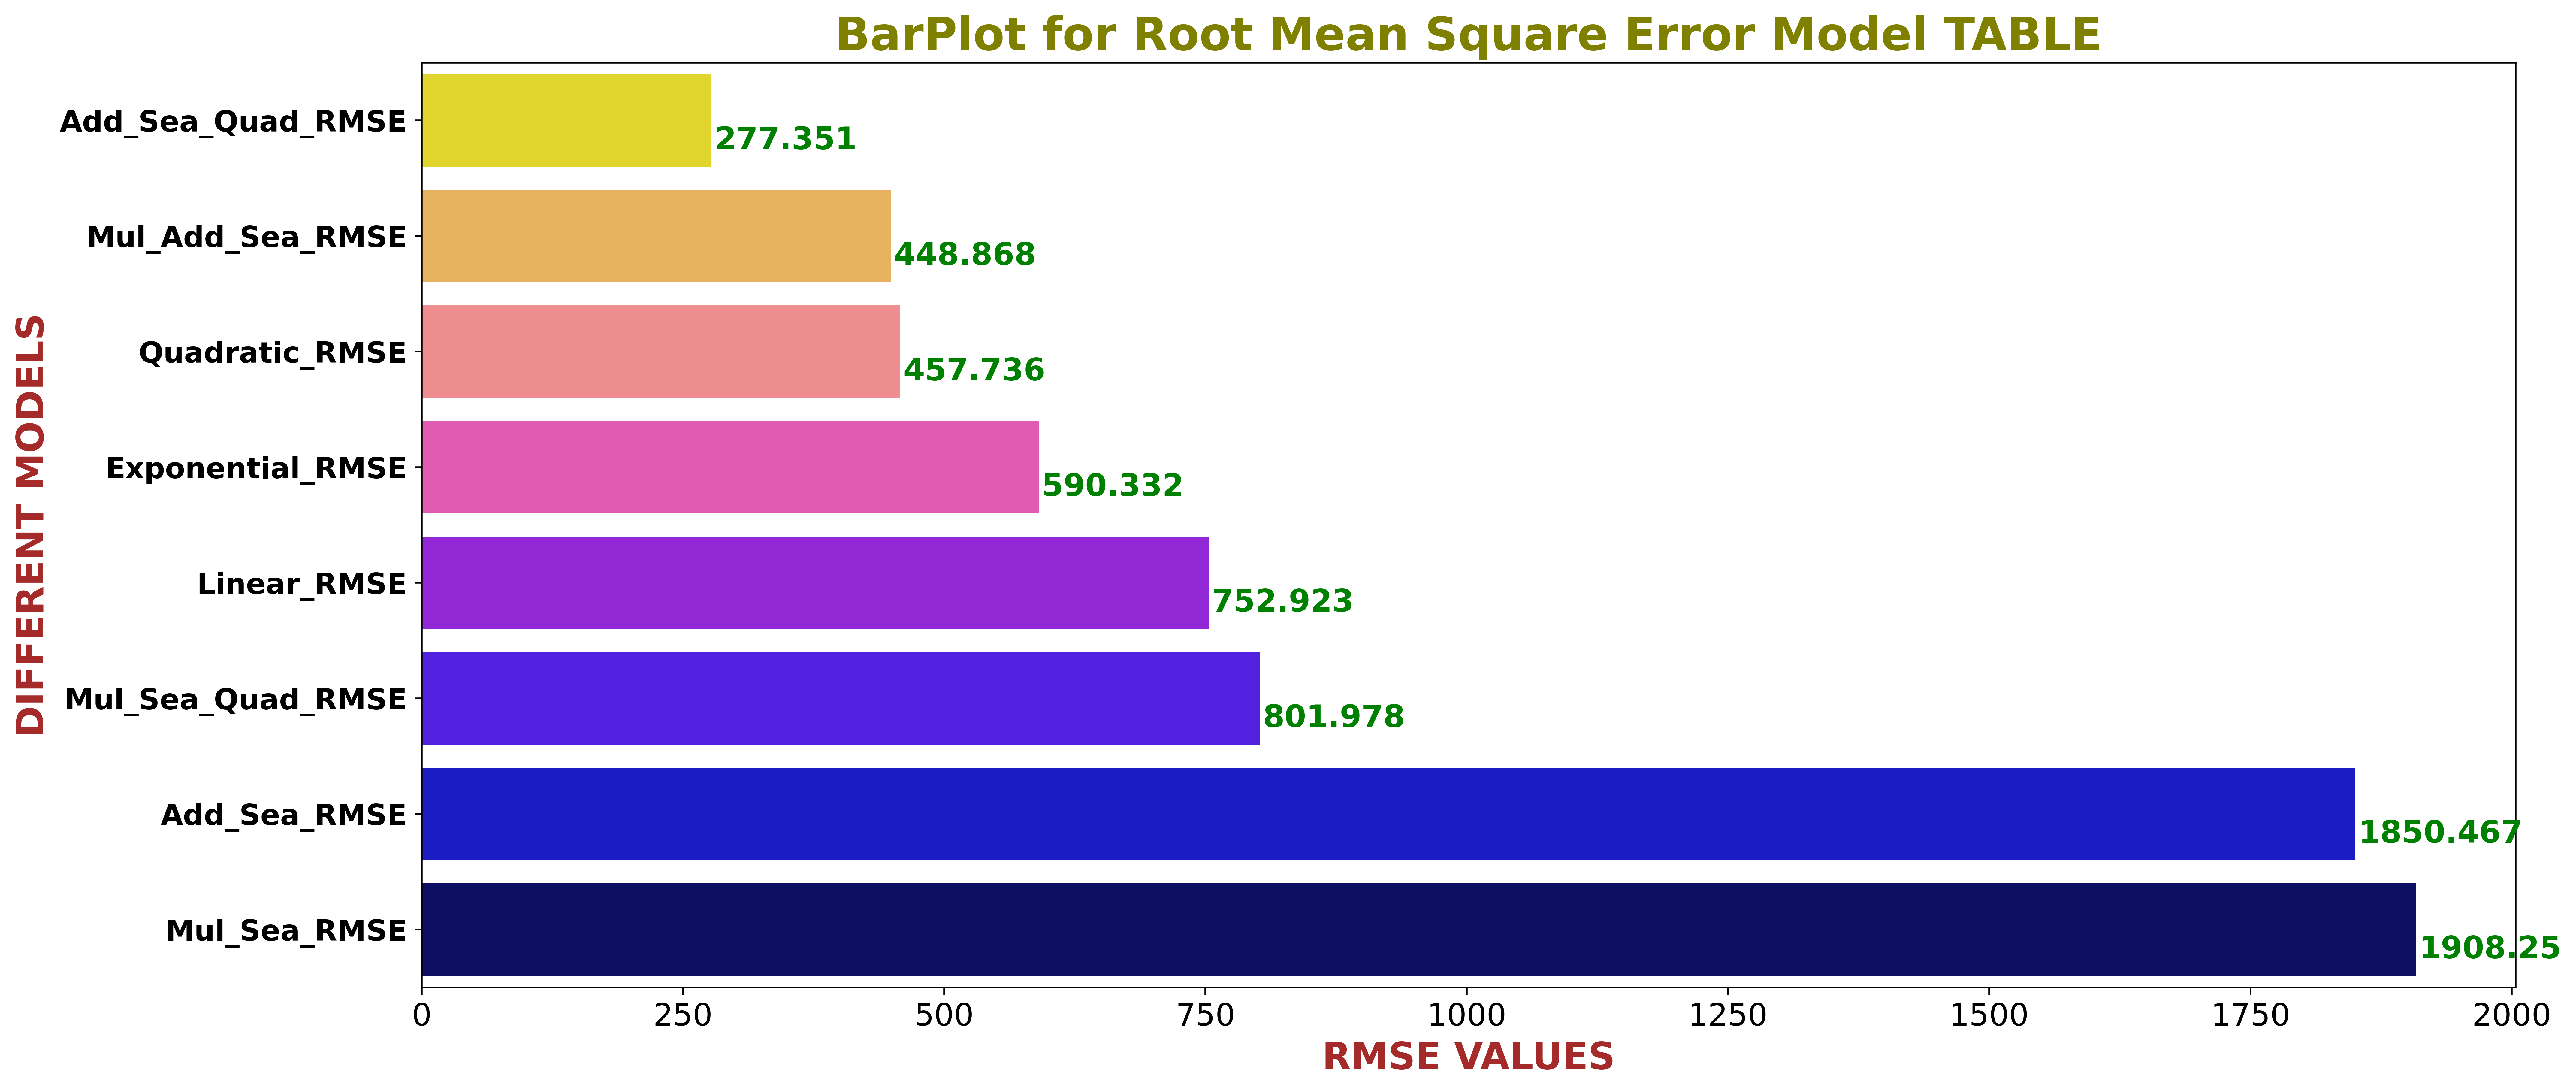

In [97]:
#barplot
f,axe=plt.subplots(1,1,figsize=(18,8),dpi=500)
sns.barplot(x='RMSE_Values',y='MODELS',data=RMSE_Table,ax=axe,palette='gnuplot2_r')
plt.xlabel('RMSE VALUES',size=18,fontweight='bold',color='brown')
plt.ylabel('DIFFERENT MODELS',size=18,fontweight='bold',color='brown')
plt.xticks(fontsize=15)
plt.yticks(fontsize=14,fontweight='bold')
plt.title('BarPlot for Root Mean Square Error Model TABLE',fontsize=22,fontweight='bold',color='olive')
for i,v in enumerate(np.round(RMSE_Table.RMSE_Values.values,3)):
  axe.text(v+3,i+.25,str(v),color='green',fontsize=15,fontweight='bold')
plt.show()

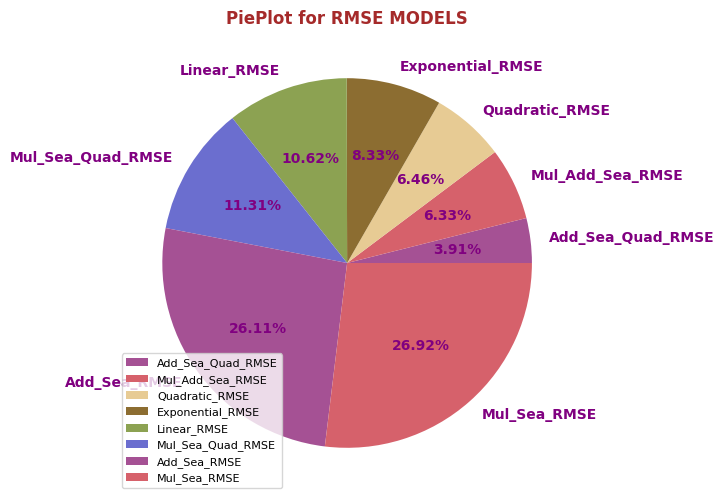

In [98]:
#pieplot
plt.figure(figsize=(6,6))
color_palette=sns.color_palette('tab20b_r')
plt.pie(RMSE_Table['RMSE_Values'],labels=RMSE_Table['MODELS'],autopct='%.2f%%',colors=color_palette,textprops={'fontweight':'bold','color':'purple'})
plt.title('PiePlot for RMSE MODELS',color='brown',fontweight='bold')
plt.legend(loc='best',fontsize=8)
plt.show()

In [99]:
#from above RMSE table we can say "Additive Seasonality Quadratic" is the best model with least error, when compared with other models.
#Add_Sea_Quad_RMSE:277.351077
#So consider additive seasonality quadratic model for further tasks

# **Forecasting a new dataset using Model Driven Method**

**Creating new dataset**

In [100]:
#now predicting the data
#creating new dataset by using existing data

In [101]:
quarter=[['Q3_96','Q3'],['Q4_96','Q4'],['Q1_97','Q1'],['Q2_97','Q2'],['Q3_97','Q3'],['Q4_97','Q4'],['Q1_98','Q1'],['Q2_98','Q2'],['Q3_98','Q3'],['Q4_98','Q4']]
quarter=pd.DataFrame(quarter,columns=['Quarter','Quarters'])

In [102]:
quarter['t']=np.arange(43,53)
quarter['t_square']=quarter['t']*quarter['t']
dum=pd.DataFrame(pd.get_dummies(quarter['Quarters']))

In [103]:
#new predicted data set for prediction or forecasting purpose
forecast_model=pd.concat([quarter,dum],axis=1)
forecast_model

Quarter Quarters   t  t_square  Q1  Q2  Q3  Q4
0   Q3_96       Q3  43      1849   0   0   1   0
1   Q4_96       Q4  44      1936   0   0   0   1
2   Q1_97       Q1  45      2025   1   0   0   0
3   Q2_97       Q2  46      2116   0   1   0   0
4   Q3_97       Q3  47      2209   0   0   1   0
5   Q4_97       Q4  48      2304   0   0   0   1
6   Q1_98       Q1  49      2401   1   0   0   0
7   Q2_98       Q2  50      2500   0   1   0   0
8   Q3_98       Q3  51      2601   0   0   1   0
9   Q4_98       Q4  52      2704   0   0   0   1

In [104]:
#forecasting on the predict_set dataframe
#now forecasting the sales for predict_set dataframe
#using entire sales_df dataframe for training purpose and predict_set dataframe for forecasting purpose
#As above after buiding models we get to know that best model with least error is "Additive Seasonality Quadratic"

# **Forecasting based on Additive Seasonality Quadratic Model**

In [105]:
#forecasting based on Additive Seasonality Quadratic Model

In [106]:
#final model
final_model=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=sales_df).fit()
forecast_final_model=pd.Series(final_model.predict(pd.DataFrame(forecast_model)))
forecast_final_model

0    5319.754557
1    5137.955882
2    5069.668337
3    5866.186600
4    5942.178733
5    5774.444481
6    5720.221359
7    6530.804045
8    6620.860601
9    6467.190772
dtype: float64

In [107]:
forecast_model['Forecasting_Sales']=pd.Series(forecast_final_model)
forecast_model

Quarter Quarters   t  t_square  Q1  Q2  Q3  Q4  Forecasting_Sales
0   Q3_96       Q3  43      1849   0   0   1   0        5319.754557
1   Q4_96       Q4  44      1936   0   0   0   1        5137.955882
2   Q1_97       Q1  45      2025   1   0   0   0        5069.668337
3   Q2_97       Q2  46      2116   0   1   0   0        5866.186600
4   Q3_97       Q3  47      2209   0   0   1   0        5942.178733
5   Q4_97       Q4  48      2304   0   0   0   1        5774.444481
6   Q1_98       Q1  49      2401   1   0   0   0        5720.221359
7   Q2_98       Q2  50      2500   0   1   0   0        6530.804045
8   Q3_98       Q3  51      2601   0   0   1   0        6620.860601
9   Q4_98       Q4  52      2704   0   0   0   1        6467.190772

In [108]:
#combining both actual value and predicted values dataframe
new_var=pd.concat([sales_df,forecast_model])
new_var

Quarter        Sales Months   t       Date Quarters Years  t_square  \
0    Q1_86  1734.827000    Jan   1 1986-01-01       Q1  1986         1   
1    Q2_86  2244.960999    Apr   2 1986-04-01       Q2  1986         4   
2    Q3_86  2533.804993    Jul   3 1986-07-01       Q3  1986         9   
3    Q4_86  2154.962997    Oct   4 1986-10-01       Q4  1986        16   
4    Q1_87  1547.818996    Jan   5 1987-01-01       Q1  1987        25   
5    Q2_87  2104.411995    Apr   6 1987-04-01       Q2  1987        36   
6    Q3_87  2014.362999    Jul   7 1987-07-01       Q3  1987        49   
7    Q4_87  1991.746998    Oct   8 1987-10-01       Q4  1987        64   
8    Q1_88  1869.049999    Jan   9 1988-01-01       Q1  1988        81   
9    Q2_88  2313.631996    Apr  10 1988-04-01       Q2  1988       100   
10   Q3_88  2128.320000    Jul  11 1988-07-01       Q3  1988       121   
11   Q4_88  2026.828999    Oct  12 1988-10-01       Q4  1988       144   
12   Q1_89  1910.603996    Jan  13 1989-01-01       Q1  1989       169   
13   Q2_89  2331.164993    Apr  14 1989-04-01       Q2  1989       196   
14   Q3_89  2206.549995    Jul  15 1989-07-01       Q3  1989       225   
15   Q4_89  2173.967995    Oct  16 1989-10-01       Q4  1989       256   
16   Q1_90  2148.278000    Jan  17 1990-01-01       Q1  1990       289   
17   Q2_90  2739.307999    Apr  18 1990-04-01       Q2  1990       324   
18   Q3_90  2792.753998    Jul  19 1990-07-01       Q3  1990       361   
19   Q4_90  2556.009995    Oct  20 1990-10-01       Q4  1990       400   
20   Q1_91  2480.973999    Jan  21 1991-01-01       Q1  1991       441   
21   Q2_91  3039.522995    Apr  22 1991-04-01       Q2  1991       484   
22   Q3_91  3172.115997    Jul  23 1991-07-01       Q3  1991       529   
23   Q4_91  2879.000999    Oct  24 1991-10-01       Q4  1991       576   
24   Q1_92  2772.000000    Jan  25 1992-01-01       Q1  1992       625   
25   Q2_92  3550.000000    Apr  26 1992-04-01       Q2  1992       676   
26   Q3_92  3508.000000    Jul  27 1992-07-01       Q3  1992       729   
27   Q4_92  3243.859993    Oct  28 1992-10-01       Q4  1992       784   
28   Q1_93  3056.000000    Jan  29 1993-01-01       Q1  1993       841   
29   Q2_93  3899.000000    Apr  30 1993-04-01       Q2  1993       900   
30   Q3_93  3629.000000    Jul  31 1993-07-01       Q3  1993       961   
31   Q4_93  3373.000000    Oct  32 1993-10-01       Q4  1993      1024   
32   Q1_94  3352.000000    Jan  33 1994-01-01       Q1  1994      1089   
33   Q2_94  4342.000000    Apr  34 1994-04-01       Q2  1994      1156   
34   Q3_94  4461.000000    Jul  35 1994-07-01       Q3  1994      1225   
35   Q4_94  4017.000000    Oct  36 1994-10-01       Q4  1994      1296   
36   Q1_95  3854.000000    Jan  37 1995-01-01       Q1  1995      1369   
37   Q2_95  4936.000000    Apr  38 1995-04-01       Q2  1995      1444   
38   Q3_95  4895.000000    Jul  39 1995-07-01       Q3  1995      1521   
39   Q4_95  4333.000000    Oct  40 1995-10-01       Q4  1995      1600   
40   Q1_96  4194.000000    Jan  41 1996-01-01       Q1  1996      1681   
41   Q2_96  5253.000000    Apr  42 1996-04-01       Q2  1996      1764   
0    Q3_96          NaN    NaN  43        NaT       Q3   NaN      1849   
1    Q4_96          NaN    NaN  44        NaT       Q4   NaN      1936   
2    Q1_97          NaN    NaN  45        NaT       Q1   NaN      2025   
3    Q2_97          NaN    NaN  46        NaT       Q2   NaN      2116   
4    Q3_97          NaN    NaN  47        NaT       Q3   NaN      2209   
5    Q4_97          NaN    NaN  48        NaT       Q4   NaN      2304   
6    Q1_98          NaN    NaN  49        NaT       Q1   NaN      2401   
7    Q2_98          NaN    NaN  50        NaT       Q2   NaN      2500   
8    Q3_98          NaN    NaN  51        NaT       Q3   NaN      2601   
9    Q4_98          NaN    NaN  52        NaT       Q4   NaN      2704   

    log_sales  Q1  Q2  Q3  Q4  Forecasting_Sales  
0    7.458663   1   0   0   0

In [109]:
new_var[['Sales','Forecasting_Sales']]

Sales  Forecasting_Sales
0   1734.827000                NaN
1   2244.960999                NaN
2   2533.804993                NaN
3   2154.962997                NaN
4   1547.818996                NaN
5   2104.411995                NaN
6   2014.362999                NaN
7   1991.746998                NaN
8   1869.049999                NaN
9   2313.631996                NaN
10  2128.320000                NaN
11  2026.828999                NaN
12  1910.603996                NaN
13  2331.164993                NaN
14  2206.549995                NaN
15  2173.967995                NaN
16  2148.278000                NaN
17  2739.307999                NaN
18  2792.753998                NaN
19  2556.009995                NaN
20  2480.973999                NaN
21  3039.522995                NaN
22  3172.115997                NaN
23  2879.000999                NaN
24  2772.000000                NaN
25  3550.000000                NaN
26  3508.000000                NaN
27  3243.859993                NaN
28  3056.000000                NaN
29  3899.000000                NaN
30  3629.000000                NaN
31  3373.000000                NaN
32  3352.000000                NaN
33  4342.000000                NaN
34  4461.000000                NaN
35  4017.000000                NaN
36  3854.000000                NaN
37  4936.000000                NaN
38  4895.000000                NaN
39  4333.000000                NaN
40  4194.000000                NaN
41  5253.000000                NaN
0           NaN        5319.754557
1           NaN        5137.955882
2           NaN        5069.668337
3           NaN        5866.186600
4           NaN        5942.178733
5           NaN        5774.444481
6           NaN        5720.221359
7           NaN        6530.804045
8           NaN        6620.860601
9           NaN        6467.190772

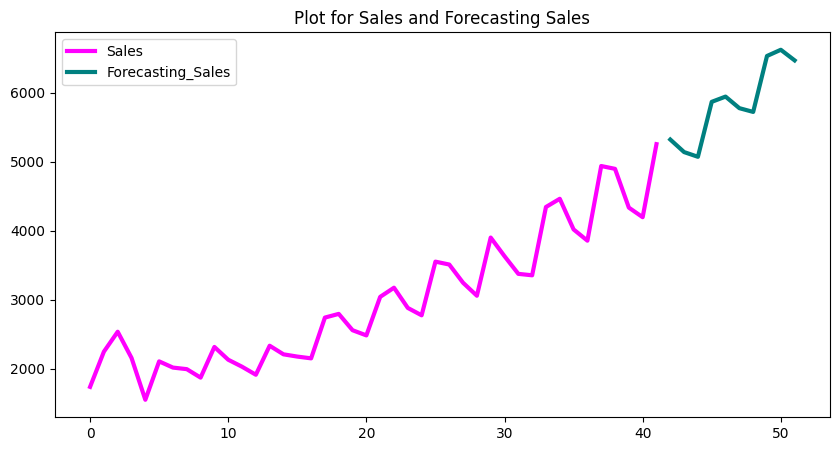

In [110]:
#plot for "sales_df data" and "forecasting_model data"
new_var[['Sales','Forecasting_Sales']].reset_index(drop=True).plot(figsize=(10,5),color=['fuchsia','teal'],linewidth=3)
plt.title('Plot for Sales and Forecasting Sales')
plt.show()

# **Observation**

In [111]:
#Additive Seasonality Quadratic Model gives the best prediction with least RMSE of 277.351077..

**Additive Seasonality Quadratic Model gives the best prediction with least RMSE of 277.351077.**

# **Data Driven Methods or Smoothing Models**

In [112]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [113]:
#Evaluate Metric MAPE
def MAPE(pred,org):
  temp=np.mean(np.abs((pred-org)/org)*100)
  return temp

**1.SimpleExponentialSmoothing**

In [114]:
#SimpleExponentialSmoothing
ses=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.5)
ses_pred=ses.predict(start=test.index[0],end=test.index[-1])
rmse_ses=np.sqrt(np.mean((np.array(test['Sales'])-np.array((ses_pred)))**2))
mape_ses=MAPE(ses_pred,test['Sales'])
print('mape_ses:',mape_ses)
print('rmse_ses:',rmse_ses)

mape_ses: 19.789335795502197
rmse_ses: 1033.5843744596125


In [115]:
ses.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   32
Model:             SimpleExpSmoothing   SSE                        3500683.790
Optimized:                      False   AIC                            375.287
Trend:                           None   BIC                            378.219
Seasonal:                        None   AICC                           376.769
Seasonal Periods:                None   Date:                 Wed, 17 Jan 2024
Box-Cox:                        False   Time:                         12:50:33
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5000000                alpha                False
initial_level              1734.8270                  l.0                False
------------------------------------------------------------------------------
"""

**2.Holt Method (or) Double Exponential Smoothing Method**

In [116]:
#Holt Method
holt=Holt(train['Sales']).fit(smoothing_level=0.3,smoothing_trend=0.15)
holt_pred=holt.predict(start=test.index[0],end=test.index[-1])
rmse_holt=np.sqrt(np.mean((np.array(test['Sales'])-np.array((holt_pred)))**2))
mape_holt=MAPE(holt_pred,test['Sales'])
print('mape_holt:',mape_holt)
print('rmse_holt:',rmse_holt)

mape_holt: 9.884888688231532
rmse_holt: 552.1271494248027


In [117]:
holt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   32
Model:                           Holt   SSE                       12273317.877
Optimized:                      False   AIC                            419.430
Trend:                       Additive   BIC                            425.293
Seasonal:                        None   AICC                           422.790
Seasonal Periods:                None   Date:                 Wed, 17 Jan 2024
Box-Cox:                        False   Time:                         12:50:33
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.1500000                 beta                False
initial_level              1734.8270                  l.0                False
initial_trend              510.13400                  b.0                False
------------------------------------------------------------------------------
"""

**3.HoltWinter Exponential Smoothing with Additive Seasonality and Additive Trend**

In [118]:
#HoltWinter Exponential Smoothing with Additive Seasonality and Additive Trend
hw_add_add=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.15,smoothing_seasonal=0.5)
hw_add_add_pred=hw_add_add.predict(start=test.index[0],end=test.index[-1])
rmse_hw_add_add=np.sqrt(np.mean((np.array(test['Sales'])-np.array((hw_add_add_pred)))**2))
mape_hw_add_add=MAPE(hw_add_add_pred,test['Sales'])
print('mape_hw_add_add:',mape_hw_add_add)
print('rmse_hw_add_add:',rmse_hw_add_add)

mape_hw_add_add: 7.44236290238406
rmse_hw_add_add: 380.9866264046368


In [119]:
hw_add_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Sales   No. Observations:                   32
Model:             ExponentialSmoothing   SSE                        1383267.677
Optimized:                         True   AIC                            373.575
Trend:                         Additive   BIC                            397.027
Seasonal:                      Additive   AICC                           426.191
Seasonal Periods:                    12   Date:                 Wed, 17 Jan 2024
Box-Cox:                          False   Time:                         12:50:33
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2000000                alpha                False
smoothing_trend               0.1500000                 beta                False
smoothing_seasonal            0.5000000                gamma                False
initial_level                 2018.0889                  l.0                 True
initial_trend                 9.2627611                  b.0                 True
initial_seasons.0            -297.63692                  s.0                 True
initial_seasons.1             195.49827                  s.1                 True
initial_seasons.2             306.99395                  s.2                 True
initial_seasons.3             47.866629                  s.3                 True
initial_seasons.4            -358.22024                  s.4                 True
initial_seasons.5             195.06868                  s.5                 True
initial_seasons.6             54.636525                  s.6                 True
initial_seasons.7            -100.18612                  s.7                 True
initial_seasons.8            -205.72320                  s.8                 True
initial_seasons.9             237.59631                  s.9                 True
initial_seasons.10            105.74497                 s.10                 True
initial_seasons.11           -135.22394                 s.11                 True
---------------------------------------------------------------------------------
"""

**4.HoltWinter Exponential Smoothing with Multiplicative Seasonality and Additive Trend**

In [120]:
#HoltWinter Exponential Smoothing with Multiplicative Seasonality and Additive Trend
hw_mul_add=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_trend=0.25,smoothing_seasonal=0.3)
hw_mul_add_pred=hw_mul_add.predict(start=test.index[0],end=test.index[-1])
rmse_hw_mul_add=np.sqrt(np.mean((np.array(test['Sales'])-np.array((hw_mul_add_pred)))**2))
mape_hw_mul_add=MAPE(hw_mul_add_pred,test['Sales'])
print("mape_hw_mul_add:",mape_hw_mul_add)
print("rmse_hw_mul_add:",rmse_hw_mul_add)

mape_hw_mul_add: 2.798325122990568
rmse_hw_mul_add: 134.34308209909548


In [121]:
hw_mul_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Sales   No. Observations:                   32
Model:             ExponentialSmoothing   SSE                        1952557.914
Optimized:                         True   AIC                            384.605
Trend:                         Additive   BIC                            408.057
Seasonal:                Multiplicative   AICC                           437.221
Seasonal Periods:                    12   Date:                 Wed, 17 Jan 2024
Box-Cox:                          False   Time:                         12:50:33
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend               0.2500000                 beta                False
smoothing_seasonal            0.3000000                gamma                False
initial_level                 1965.4564                  l.0                 True
initial_trend                -1.9116214                  b.0                 True
initial_seasons.0             0.9563791                  s.0                 True
initial_seasons.1             1.2269301                  s.1                 True
initial_seasons.2             1.3091389                  s.2                 True
initial_seasons.3             1.0864521                  s.3                 True
initial_seasons.4             0.9054774                  s.4                 True
initial_seasons.5             1.1575555                  s.5                 True
initial_seasons.6             1.0689207                  s.6                 True
initial_seasons.7             0.9801535                  s.7                 True
initial_seasons.8             0.9365977                  s.8                 True
initial_seasons.9             1.1840830                  s.9                 True
initial_seasons.10            1.1554311                 s.10                 True
initial_seasons.11            1.0110842                 s.11                 True
---------------------------------------------------------------------------------
"""

**5.HoltWinter Exponential Smoothing with Additive Seasonality and Muliplicative Trend**

In [122]:
#HoltWinter Exponential Smoothing with Additive Seasonality and Muliplicative Trend
hw_add_mul=ExponentialSmoothing(train['Sales'],seasonal='add',trend='mul',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.25,smoothing_seasonal=0.5)
hw_add_mul_pred=hw_add_mul.predict(start=test.index[0],end=test.index[-1])
rmse_hw_add_mul=np.sqrt(np.mean((np.array(test['Sales'])-np.array((hw_add_mul_pred)))**2))
mape_hw_add_mul=MAPE(hw_add_mul_pred,test['Sales'])
print('mape_hw_add_mul:',mape_hw_add_mul)
print('rmse_hw_add_mul:',rmse_hw_add_mul)

mape_hw_add_mul: 4.822120261844067
rmse_hw_add_mul: 269.5165468754486


In [123]:
hw_add_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Sales   No. Observations:                   32
Model:             ExponentialSmoothing   SSE                        1960998.441
Optimized:                         True   AIC                            384.743
Trend:                   Multiplicative   BIC                            408.195
Seasonal:                      Additive   AICC                           437.359
Seasonal Periods:                    12   Date:                 Wed, 17 Jan 2024
Box-Cox:                          False   Time:                         12:50:33
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2000000                alpha                False
smoothing_trend               0.2500000                 beta                False
smoothing_seasonal            0.5000000                gamma                False
initial_level                 1970.8526                  l.0                 True
initial_trend                 1.0167533                  b.0                 True
initial_seasons.0            -226.94535                  s.0                 True
initial_seasons.1             137.67173                  s.1                 True
initial_seasons.2            -35.951061                  s.2                 True
initial_seasons.3            -124.27535                  s.3                 True
initial_seasons.4            -223.70231                  s.4                 True
initial_seasons.5             288.32903                  s.5                 True
initial_seasons.6             1.0130672                  s.6                 True
initial_seasons.7            -32.518809                  s.7                 True
initial_seasons.8            -145.17202                  s.8                 True
initial_seasons.9             312.25373                  s.9                 True
initial_seasons.10            101.13074                 s.10                 True
initial_seasons.11           -51.833391                 s.11                 True
---------------------------------------------------------------------------------
"""

**6.HoltWinter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend**

In [124]:
#HoltWinter Exponential Smoothing with Multiplicative Seasonality and Multiplicative Trend
hw_mul_mul=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='mul',seasonal_periods=12).fit(smoothing_level=0.2,smoothing_trend=0.15,smoothing_seasonal=0.5)
hw_mul_mul_pred=hw_mul_mul.predict(start=test.index[0],end=test.index[-1])
rmse_hw_mul_mul=np.sqrt(np.mean((np.array(test['Sales'])-np.array((hw_mul_mul_pred)))**2))
mape_hw_mul_mul=MAPE(hw_mul_mul_pred,test['Sales'])
print('mape_hw_mul_mul:',mape_hw_mul_mul)
print('rmse_hw_mul_mul:',rmse_hw_mul_mul)

mape_hw_mul_mul: 3.0148796343644113
rmse_hw_mul_mul: 144.21675969399055


In [125]:
hw_mul_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                    Sales   No. Observations:                   32
Model:             ExponentialSmoothing   SSE                        1300838.905
Optimized:                         True   AIC                            371.609
Trend:                   Multiplicative   BIC                            395.061
Seasonal:                Multiplicative   AICC                           424.224
Seasonal Periods:                    12   Date:                 Wed, 17 Jan 2024
Box-Cox:                          False   Time:                         12:50:33
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2000000                alpha                False
smoothing_trend               0.1500000                 beta                False
smoothing_seasonal            0.5000000                gamma                False
initial_level                 1970.8526                  l.0                 True
initial_trend                 1.0177902                  b.0                 True
initial_seasons.0             0.9547435                  s.0                 True
initial_seasons.1             1.1541083                  s.1                 True
initial_seasons.2             1.2857235                  s.2                 True
initial_seasons.3             1.0970794                  s.3                 True
initial_seasons.4             0.9075729                  s.4                 True
initial_seasons.5             1.1296370                  s.5                 True
initial_seasons.6             1.0999790                  s.6                 True
initial_seasons.7             1.0320192                  s.7                 True
initial_seasons.8             1.0175915                  s.8                 True
initial_seasons.9             1.1910582                  s.9                 True
initial_seasons.10            1.1895284                 s.10                 True
initial_seasons.11            1.0466947                 s.11                 True
---------------------------------------------------------------------------------
"""

**DataFrame showing MAPE Values**

In [126]:
#dataframe showing MAPE Values

In [127]:
data={'MODELS':pd.Series(['SES_MAPE','HOLT_MAPE','HW_Add_Add_MAPE','HW_Mul_Add_MAPE','HW_Add_Mul_MAPE','HW_Mul_Mul_MAPE']),
      'MAPE_Values':pd.Series([mape_ses,mape_holt,mape_hw_add_add,mape_hw_mul_add,mape_hw_add_mul,mape_hw_mul_mul]),
      'RMSE_Values':pd.Series([rmse_ses,rmse_holt,rmse_hw_add_add,rmse_hw_mul_add,rmse_hw_add_mul,rmse_hw_mul_mul])}
MAPE_Table=pd.DataFrame(data)
MAPE_Table.sort_values(['MAPE_Values'],inplace=True)
MAPE_Table

MODELS  MAPE_Values  RMSE_Values
3  HW_Mul_Add_MAPE     2.798325   134.343082
5  HW_Mul_Mul_MAPE     3.014880   144.216760
4  HW_Add_Mul_MAPE     4.822120   269.516547
2  HW_Add_Add_MAPE     7.442363   380.986626
1        HOLT_MAPE     9.884889   552.127149
0         SES_MAPE    19.789336  1033.584374

In [128]:
#Best Model with Least Error is HoltWinter Exponential Smoothing with Multiplicative Seasonality and Additive Trend.

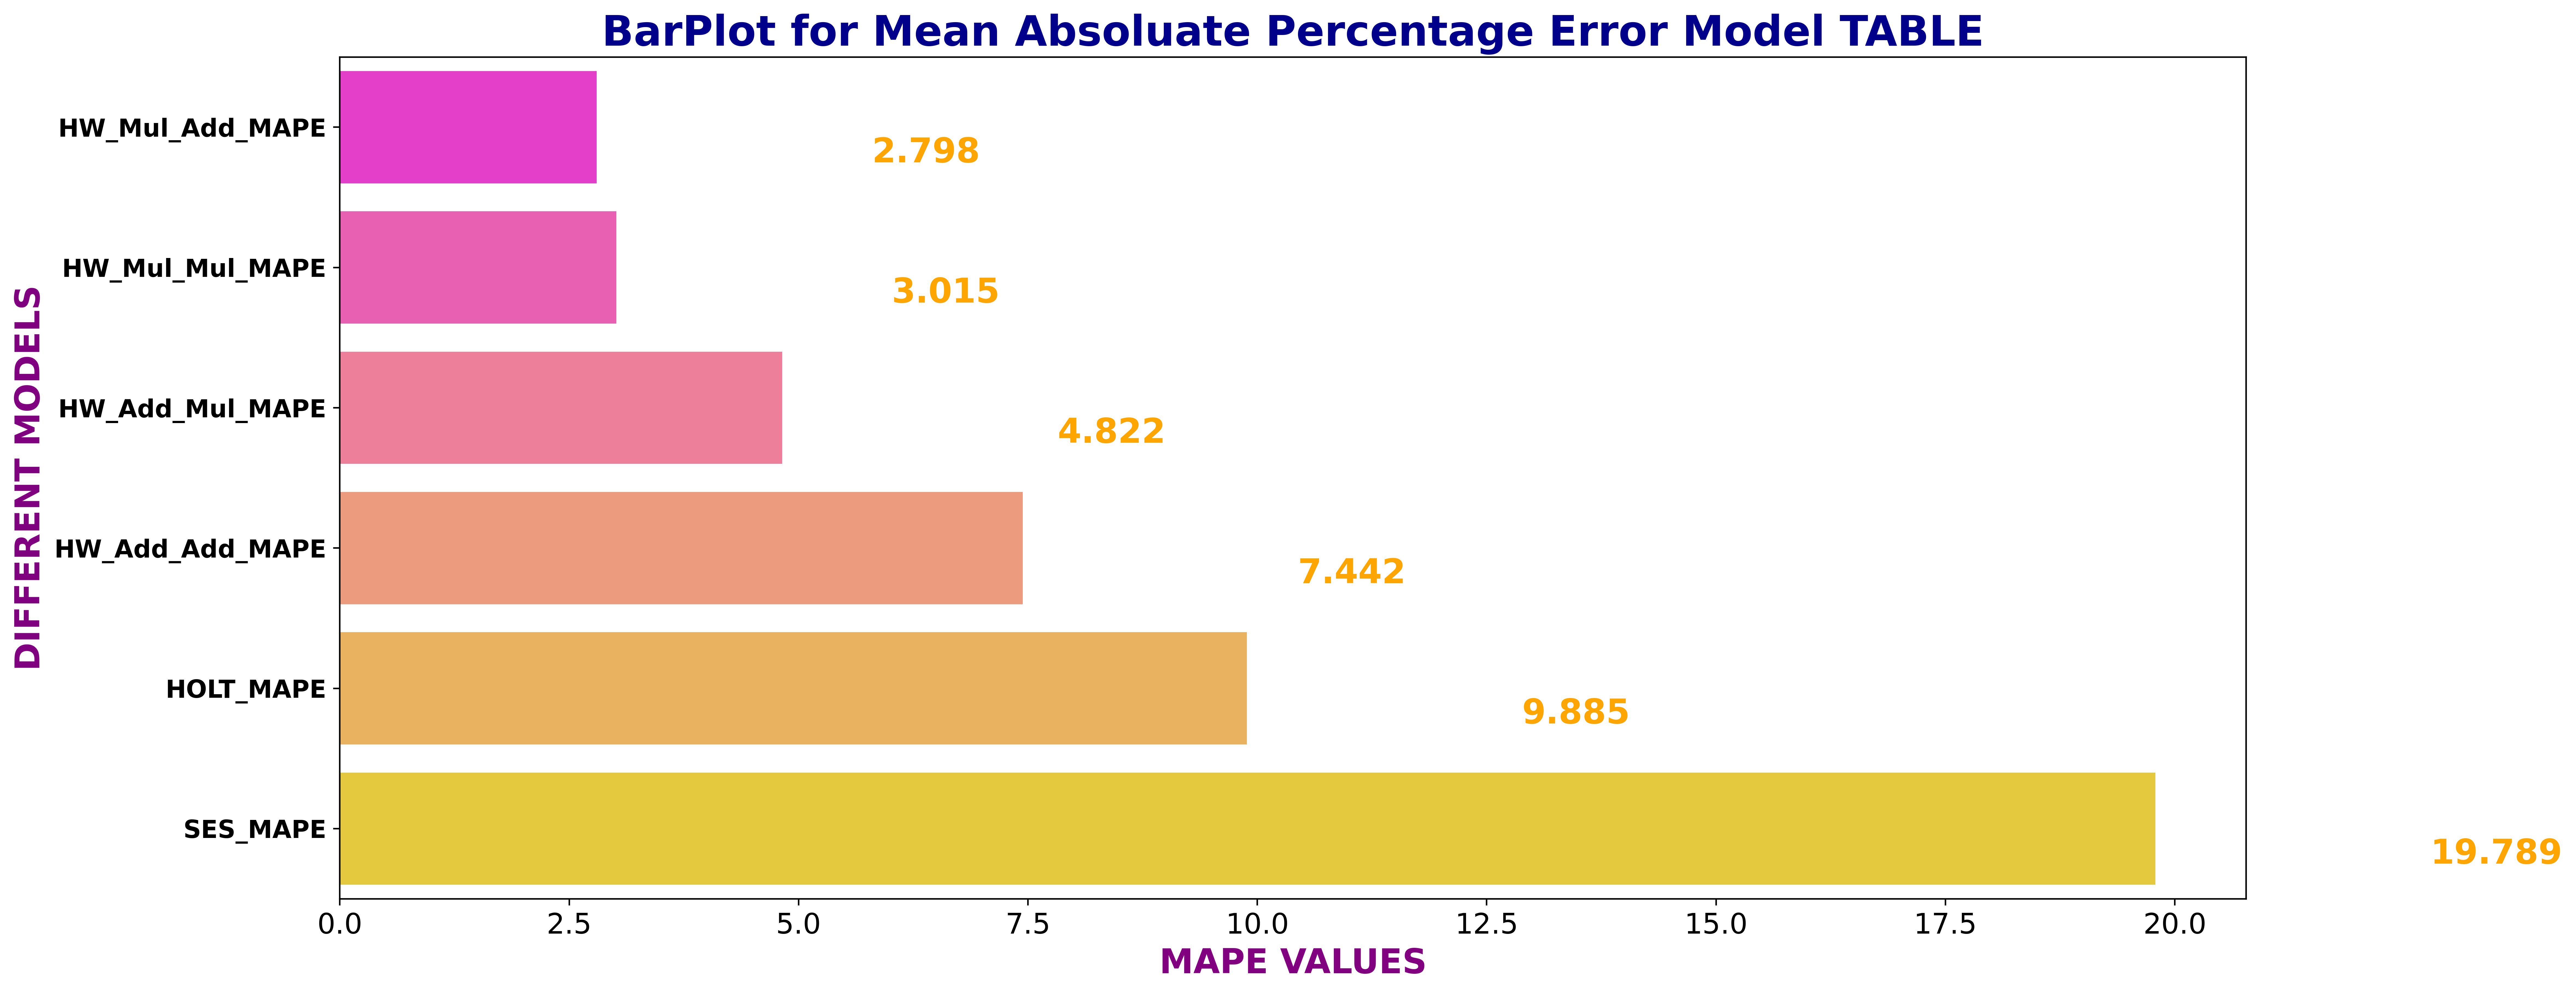

In [129]:
#barplot for MAPE values
f,axe=plt.subplots(1,1,figsize=(18,8),dpi=500)
sns.barplot(x='MAPE_Values',y='MODELS',data=MAPE_Table,ax=axe,palette='spring')
plt.xlabel('MAPE VALUES',size=18,fontweight='bold',color='purple')
plt.xticks(fontsize=15)
plt.ylabel('DIFFERENT MODELS',size=18,fontweight='bold',color='purple')
plt.yticks(fontsize=13,fontweight='bold')
plt.title('BarPlot for Mean Absoluate Percentage Error Model TABLE',fontsize=22,fontweight='bold',color='darkblue')
for i,v in enumerate(np.round(MAPE_Table.MAPE_Values.values,3)):
  axe.text(v+3,i+.25,str(v),color='orange',fontsize=18,fontweight='bold')
plt.show()

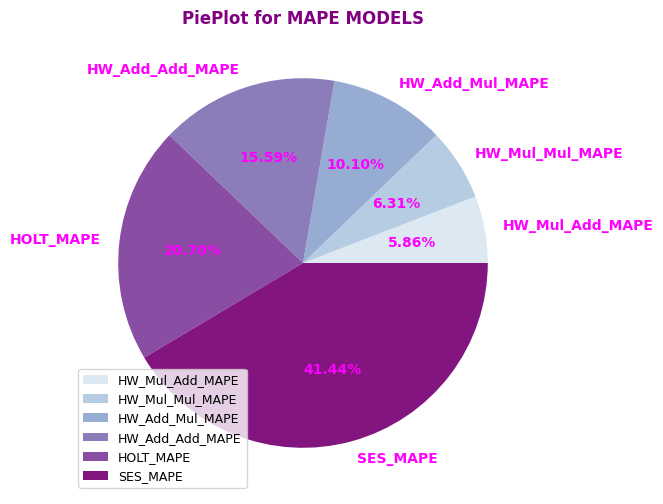

In [130]:
#PiePlot for MAPE values
plt.figure(figsize=(6,6))
color_palette=sns.color_palette('BuPu')
plt.pie(MAPE_Table['MAPE_Values'],labels=MAPE_Table['MODELS'],autopct='%.2f%%',colors=color_palette,textprops={'fontsize':10,'fontweight':'bold','color':'fuchsia'})
plt.title('PiePlot for MAPE MODELS',color='purple',fontweight='bold')
plt.legend(loc='lower left',fontsize=9)
plt.show()

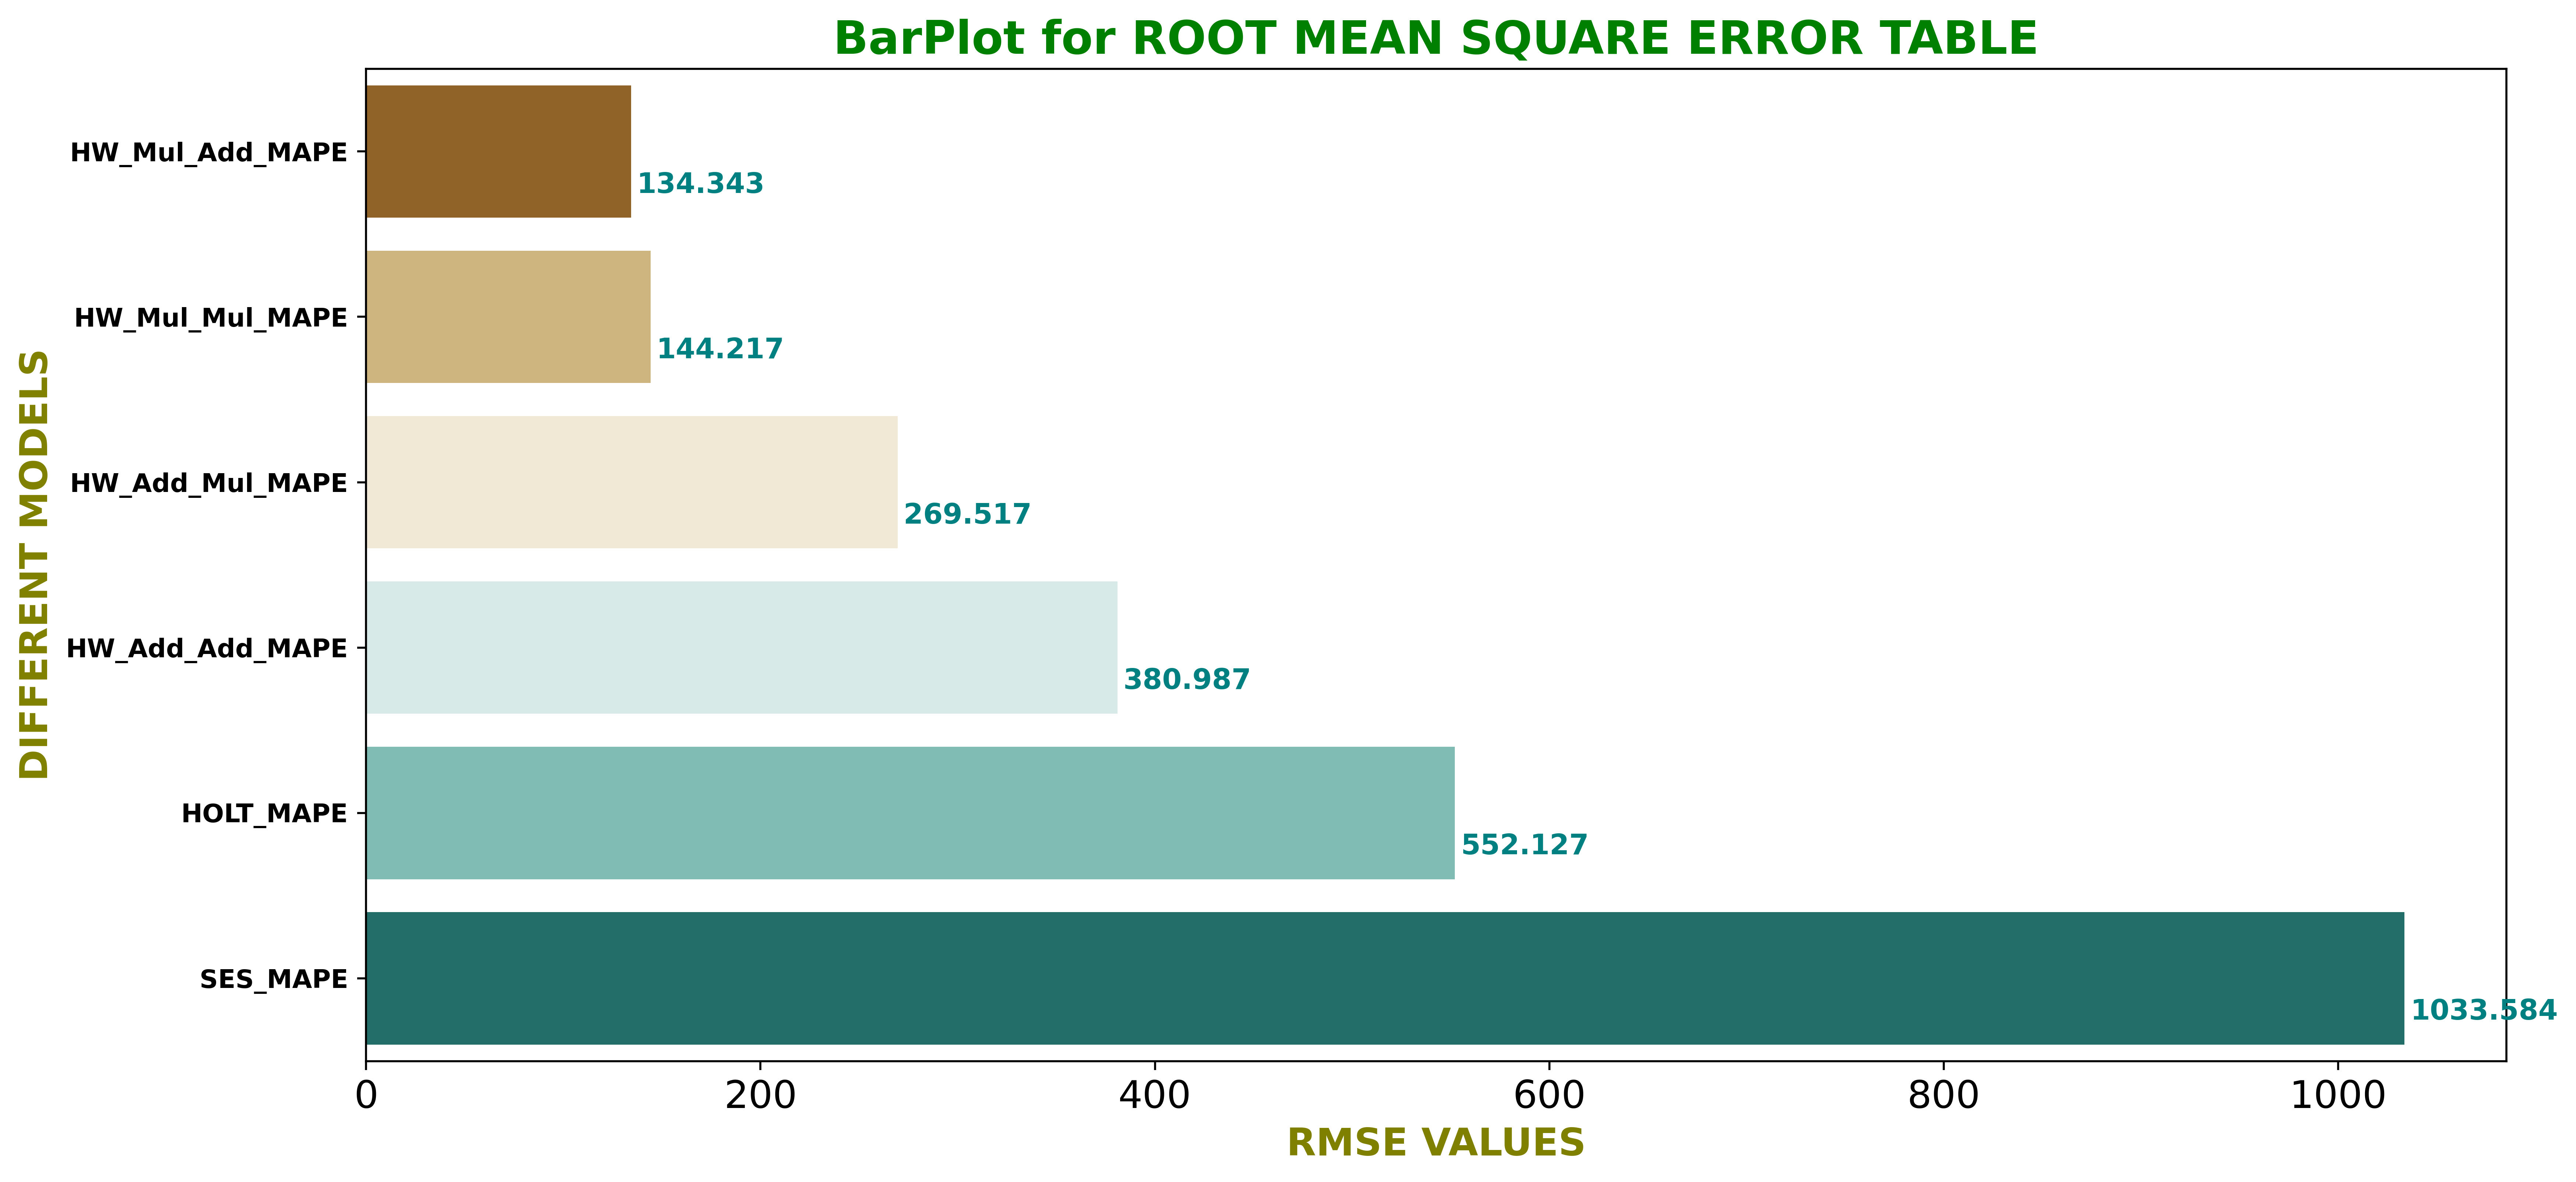

In [131]:
#barplot for RMSE values
f,axe=plt.subplots(1,1,figsize=(15,7),dpi=500)
sns.barplot(x='RMSE_Values',y='MODELS',data=MAPE_Table,ax=axe,palette='BrBG')
plt.xlabel('RMSE VALUES',fontsize=15,fontweight='bold',color='olive')
plt.xticks(fontsize=15)
plt.ylabel('DIFFERENT MODELS',fontsize=15,fontweight='bold',color='olive')
plt.yticks(fontsize=10,fontweight='bold')
plt.title('BarPlot for ROOT MEAN SQUARE ERROR TABLE',fontsize=18,fontweight='bold',color='green')
for i,v in enumerate(np.round(MAPE_Table.RMSE_Values.values,3)):
  axe.text(v+3,i+.25,str(v),fontsize=11,fontweight='bold',color='teal')
plt.show()

In [132]:
#HoltWinter Exponential Smoothing with multiplicative seasonality with additive trend is best model with least error.

# **Predicting using Smoothing Models**

In [133]:
#After training all the Models we get to know that,
#"HoltWinter Exponential Smoothing with Multiplicative Seasonality and Additive Trend" is the best model with the least error

In [134]:
#final model combination with training and testing data
#consider sales_df data as training data and forecast for next 1 time period

In [135]:
#final model for smoothing model
final_smoothing=ExponentialSmoothing(sales_df['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_trend=0.25,smoothing_seasonal=0.3)

In [136]:
#forecasting for next 10 time periods
forecastsmoothing=final_smoothing.forecast(10)
forecastsmoothing

42    5024.812715
43    4717.517337
44    4559.205378
45    5816.792365
46    5838.301563
47    5278.240468
48    4973.662971
49    6337.239853
50    6331.727686
51    5736.396921
dtype: float64

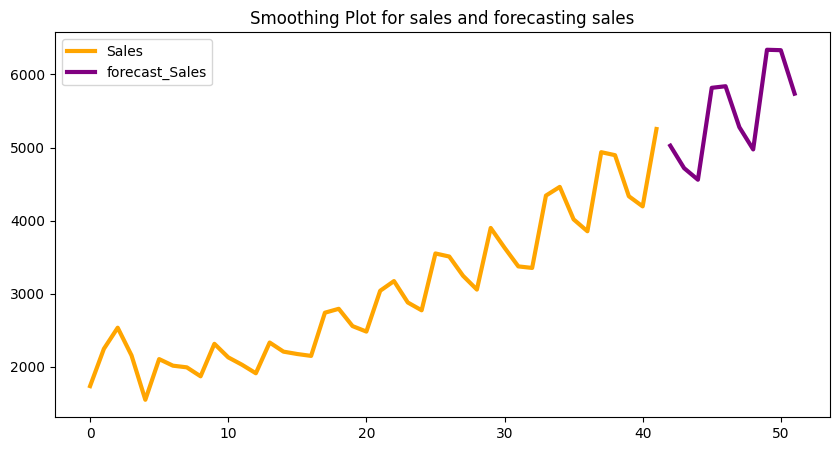

In [137]:
#plot for "sales_df data" and "smoothing model predicted data"
sales_df['Sales'].plot(figsize=(10,5),label='Sales',linewidth=3,color='orange')
forecastsmoothing.plot(figsize=(10,5),label='forecast_Sales',linewidth=3,color='purple')
plt.title('Smoothing Plot for sales and forecasting sales')
plt.legend(loc='best')
plt.show()

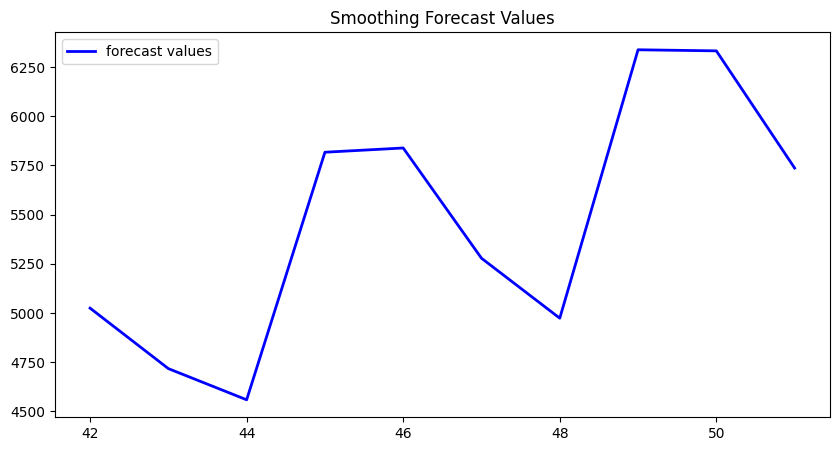

In [138]:
#plot for smoothing forecast values
forecastsmoothing.plot(figsize=(10,5),label='forecast values',linewidth=2,color='blue')
plt.title('Smoothing Forecast Values')
plt.legend()
plt.show()

# **Observation**

In [139]:
#HoltWinter Smoothing Method with Multiplicative Seasonality and Additive Trend gives the best prediction method
#with least MAPE of 2.798325

HoltWinter Smoothing Method with Multiplicative Seasonality and Additive Trend gives the best prediction model
with least MAPE of 2.798325

# **Forecasting using ARIMA MODEL**

In [140]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.0 MB/s eta 0:00:00


In [141]:
#fit auto_arima method
stepwise=auto_arima(sales_df['Sales'],start_p=1,start_q=1,max_p=3,max_q=3,max=12,trace=True,error_action='ignore',supress_warning=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=608.949, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=617.615, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=619.036, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=607.723, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=617.215, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=606.079, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=607.920, Time=0.91 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=596.966, Time=0.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=577.614, Time=0.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=579.745, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=557.132, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=559.112, Time=1.12 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=576.431, Time=0.91 sec

Best model:  ARIMA(3,1,3)(0,0,0)[0] intercept
Tota

In [142]:
stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -270.566
Date:                Wed, 17 Jan 2024   AIC                            557.132
Time:                        12:50:57   BIC                            570.841
Sample:                             0   HQIC                           562.124
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    281.4705     71.212      3.953      0.000     141.898     421.043
ar.L1         -1.0214      0.052    -19.559      0.000      -1.124      -0.919
ar.L2         -1.0119      0.064    -15.756      0.000      -1.138      -0.886
ar.L3         -0.9872      0.023    -42.393      0.000      -1.033      -0.942
ma.L1          0.9292      0.211      4.396      0.000       0.515       1.343
ma.L2          0.5201      0.278      1.874      0.061      -0.024       1.064
ma.L3          0.4689      0.177      2.656      0.008       0.123       0.815
sigma2      2.023e+04   5213.572      3.881      0.000       1e+04    3.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.15
Prob(Q):                              0.95   Prob(JB):                         0.08
Heteroskedasticity (H):               0.59   Skew:                            -0.70
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Building SARIMAX MODEL**

In [143]:
#building sarimax model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax=SARIMAX(train['Sales'],order=(0,1,1),seasonal_order=(2,1,1,12))
sarimax_res=sarimax.fit()
sarimax_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   32
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -130.984
Date:                            Wed, 17 Jan 2024   AIC                            271.967
Time:                                    12:50:59   BIC                            276.689
Sample:                                         0   HQIC                           272.766
                                             - 32                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0079      0.271     -0.029      0.977      -0.539       0.523
ar.S.L12       0.5192      7.752      0.067      0.947     -14.674      15.712
ar.S.L24       0.4798      7.623      0.063      0.950     -14.461      15.420
ma.S.L12      -1.0000      5.349     -0.187      0.852     -11.483       9.483
sigma2      4.979e+04      0.000   3.51e+08      0.000    4.98e+04    4.98e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.88   Prob(JB):                         0.77
Heteroskedasticity (H):               0.37   Skew:                             0.24
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.53e+25. Standard errors may be unstable.
"""

In [144]:
#prediction sarimax model
start=len(train)
end=len(train)+len(test)-1
sarimax_pred=sarimax_res.predict(start,end,type='levels')
sarimax_pred

32    3276.052750
33    3779.853747
34    3759.752673
35    3558.680432
36    3447.280008
37    4053.561862
38    3972.003730
39    3819.009608
40    3708.879824
41    4430.793897
Name: predicted_mean, dtype: float64

In [145]:
#RMSE and MAPE Values
rmse_sarimax=np.sqrt(np.mean((np.array(test['Sales'])-np.array(sarimax_pred))**2))
mape_sarimax=MAPE(sarimax_pred,test['Sales'])
print('rmse_sarimax :',rmse_sarimax)
print('mape_sarimax :',mape_sarimax)

rmse_sarimax : 632.0737262089809
mape_sarimax : 12.870949538957651


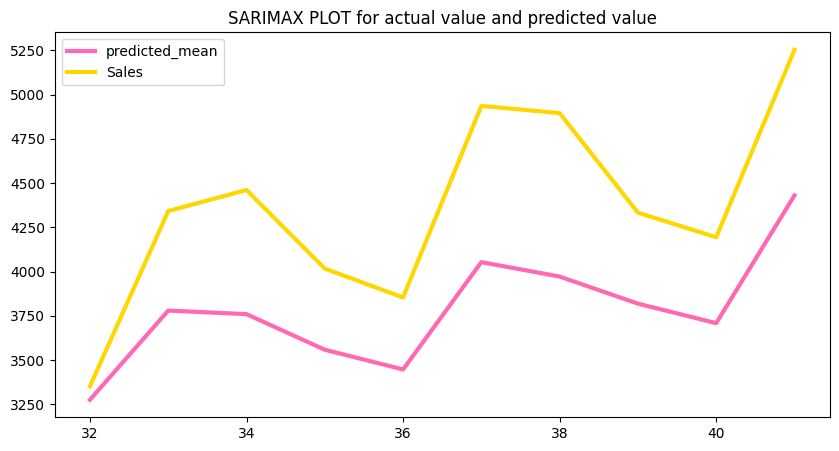

In [146]:
#plot for  actual model and sarimax predicted model
sarimax_pred.plot(figsize=(10,5),linewidth=3,color='hotpink',legend=True)
test['Sales'].plot(figsize=(10,5),linewidth=3,color='gold',legend=True)
plt.title('SARIMAX PLOT for actual value and predicted value')
plt.show()

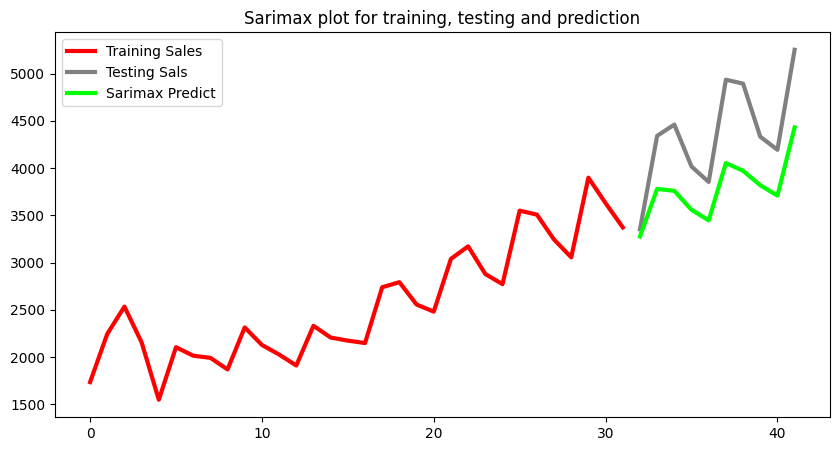

In [147]:
#plot for train,test,sarimax predict
plt.figure(figsize=(10,5))
plt.plot(train['Sales'],linewidth=3,label='Training Sales',color='red')
plt.plot(test['Sales'],linewidth=3,label='Testing Sals',color='gray')
plt.plot(sarimax_pred,linewidth=3,label='Sarimax Predict',color='lime')
plt.title('Sarimax plot for training, testing and prediction')
plt.legend()
plt.show()

# **Observation**

In [148]:
#In ARIMA MODEL the RMSE Value we got is 632.0737262089809

**In ARIMA MODEL the RMSE Value we got is 632.0737262089809**

# **Conclusion**

In [149]:
#So In this problem we have performed 3 methods or techiques["Forecasting Models","Smoothing Models","ARIMA Models"]

In [150]:
#In Forecasting Model Building the best models with least errors is Additive Seasonality Quadratic Model
#In Smoothing Model Buidings the best model with least errors is HoltWinter Smoothing Method with Multiplicative Seasonality and Additive Trend
#In ARIMA Model the best model with least error we had perform is SARIMAX MODEL

In [151]:
#In Additive Seasonality Quadratic Model , RMSE or Error we got is [Add_Sea_Quad_RMSE:277.351077]
#In HoltWinterSmoothing Method with multiplicative seasonality and additive trend model , Error we got is
#for MAPE [hw_mul_add_mape:2.798325] , for RMSE [hw_mul_add_rmse:134.343082]
#In ARIMA Sarimax Model , RMSE or ERROR we got is [rmse_sarimax:632.0737262089809]

In [152]:
#So Best Model with least error is HoltWinterSmoothing Method with Multiplicative Seasonality and Additive Trend Model

**DataFrame showing Error values of all method Models**

In [153]:
#dataframe of all models and errors
fin_err_df={'DIFFERENT MODELS':pd.Series(['Linear','Exponential','Quadratic','Add_Sea','Add_Sea_Quad','Mul_Sea','Mul_Sea_Quad','Mul_Add_Sea',
                                          'SES','HOLT','HW_Add_Add','HW_Mul_Add','HW_Add_Mul','HW_Mul_Mul','SARIMAX']),
            'ERRORS':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_sea_quad,rmse_mul_add_sea,
                                rmse_ses,rmse_holt,rmse_hw_add_add,rmse_hw_mul_add,rmse_hw_add_mul,rmse_hw_mul_mul,rmse_sarimax])}

ERROR_TABLE=pd.DataFrame(fin_err_df)
ERROR_TABLE.sort_values(['ERRORS'],inplace=True)
ERROR_TABLE

DIFFERENT MODELS       ERRORS
11       HW_Mul_Add   134.343082
13       HW_Mul_Mul   144.216760
12       HW_Add_Mul   269.516547
4      Add_Sea_Quad   277.351077
10       HW_Add_Add   380.986626
7       Mul_Add_Sea   448.867818
2         Quadratic   457.735736
9              HOLT   552.127149
1       Exponential   590.331643
14          SARIMAX   632.073726
0            Linear   752.923393
6      Mul_Sea_Quad   801.977786
8               SES  1033.584374
3           Add_Sea  1850.466546
5           Mul_Sea  1908.250395

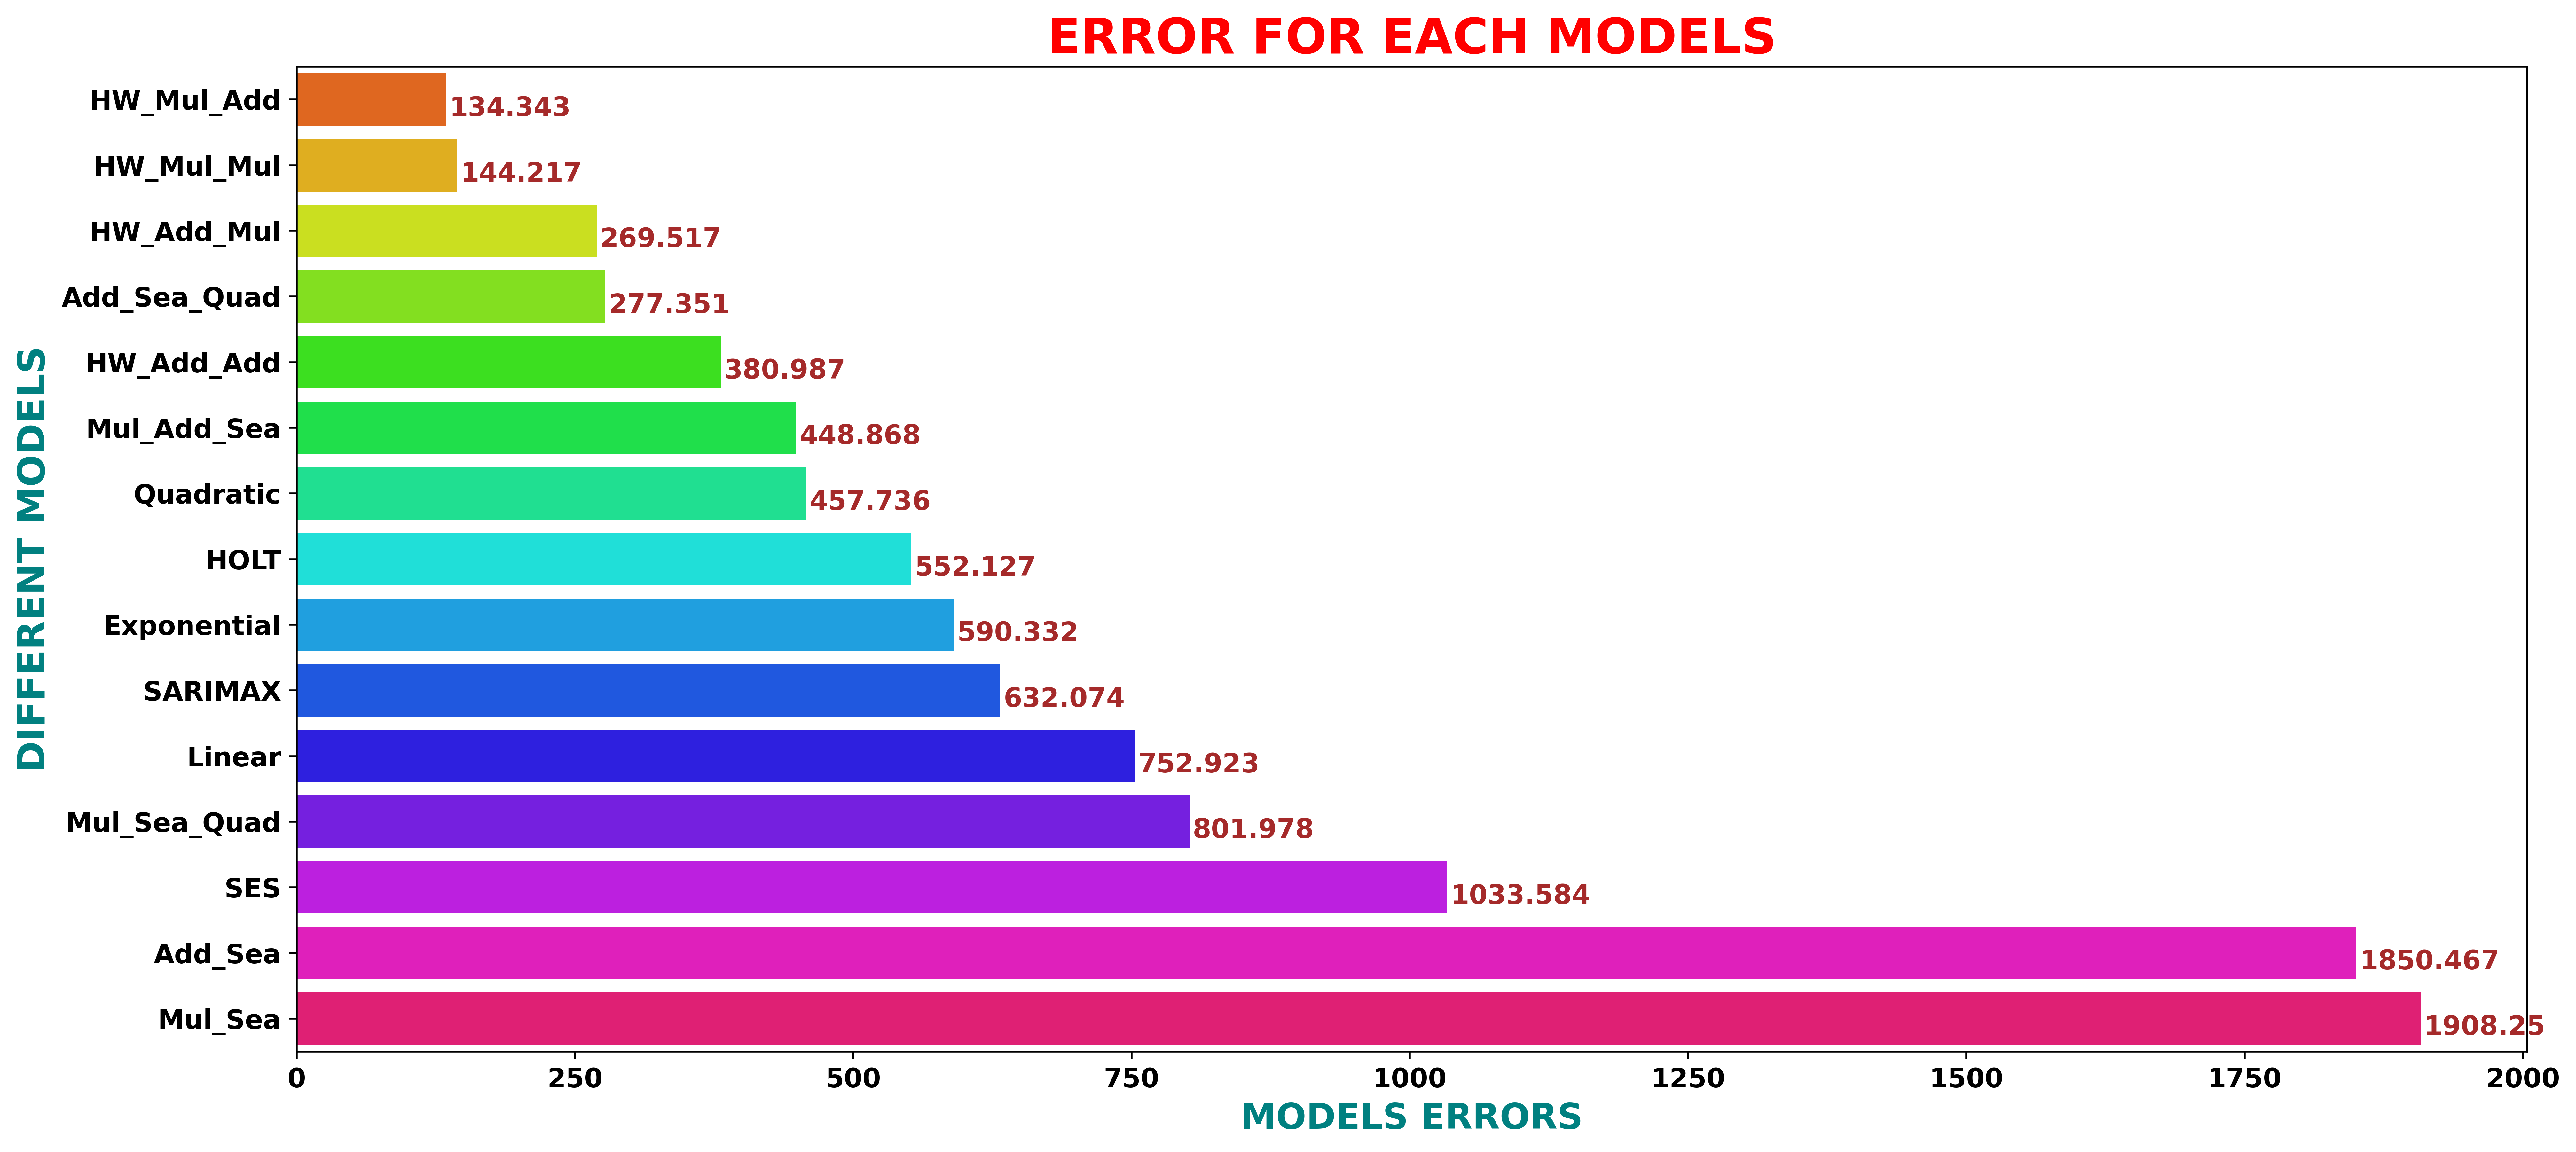

In [154]:
#BarPlot
f,axe=plt.subplots(1,1,figsize=(18,8),dpi=500)
sns.barplot(x='ERRORS',y='DIFFERENT MODELS',data=ERROR_TABLE,ax=axe,palette='hsv')
plt.xlabel('MODELS ERRORS',fontsize=16,fontweight='bold',color='teal')
plt.xticks(fontsize=12,fontweight='bold')
plt.ylabel('DIFFERENT MODELS',fontsize=17,fontweight='bold',color='teal')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('ERROR FOR EACH MODELS',fontsize=22,fontweight='bold',color='red')
for i,v in enumerate(np.round(ERROR_TABLE.ERRORS.values,3)):
  axe.text(v+3,i+.25,str(v),fontsize=12,fontweight='bold',color='brown')
plt.show()

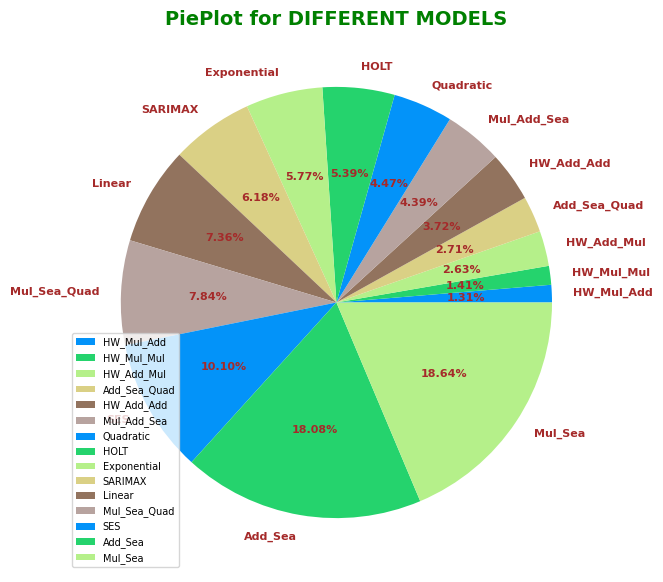

In [155]:
#pie chart
plt.figure(figsize=(7,7))
color_palette=sns.color_palette('terrain')
plt.pie(ERROR_TABLE['ERRORS'],labels=ERROR_TABLE['DIFFERENT MODELS'],autopct='%.2f%%',colors=color_palette,textprops={'fontsize':8,'fontweight':'bold','color':'brown'})
plt.title('PiePlot for DIFFERENT MODELS',fontweight='bold',color='green',fontsize=14)
plt.legend(loc='lower left',fontsize=7)
plt.show()

In [156]:
#So from above different model building techinques we have got least error in,
#HoltWinter Exponential Smoothing Method with Multiplicative Seasonality and Additive Trend.
#HoltWinter Exponential Smoothing Method with Multiplicative Seasonality and Additive Trend gives the best prediction with
#least error i.e (MAPE:2.798325) ; (RMSE:134.343082)

**So Best Model with Least Error is HoltWinterSmoothing Method with Multiplicative Seasonality and Additive Trend Model**

# **Final Model Building**

In [157]:
#final model building with holtwinter smoothing method with multiplicative seasonality and additive trend.

In [158]:
#final model
Final=ExponentialSmoothing(sales_df['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit(smoothing_level=0.1,smoothing_trend=0.25,smoothing_seasonal=0.3)

In [159]:
#forecast for next 10 time periods
Final.forecast(10)

42    5024.812715
43    4717.517337
44    4559.205378
45    5816.792365
46    5838.301563
47    5278.240468
48    4973.662971
49    6337.239853
50    6331.727686
51    5736.396921
dtype: float64

In [160]:
#Therefore prediction for next 10 time periods

In [161]:
###Completed/////

# **Completed**